In [ ]:
# #시각화 초기셋팅
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [ ]:
import pandas as pd
import numpy as np 

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 
import matplotlib.ticker as ticker
import seaborn as sns
sns.set()

%config InlineBackend.figure_format = 'retina' #그래프 화질 높이기

# 데이터셋 불러오기 & 전처리

## naver_movie 

In [ ]:
df = pd.read_csv('naver_movie(utf-8).csv', encoding="utf-8")

In [ ]:
df

,Unnamed: 0,title,director,genre,time,country,point,grade,year,date,actor,movie_cd
0,0,1987,장준환,드라마,129.0,한국,9.23,15세 관람가,2017.0,2017.12.27,김윤석/하정우/유해진/김태리/박희순/이희준/유승목/현봉식/박지환/이용직/박지홍/김경...,20170590
1,1,1급기밀,홍기선,드라마,101.0,한국,8.89,12세 관람가,2018.0,2018.01.24,김상경/김옥빈/최무성/최귀화/김병철/서현우/황보라/김경남/이항나/이지원/지건우/성병...,20168161
2,2,48미터,민백두,드라마,97.0,한국,8.94,15세 관람가,2013.0,2013.07.04,박효주/이진희/하석/조한철/안세호/주민하/김용진/지안/김광현/강윤서,20120801
3,3,4등,정지우,드라마,116.0,한국,8.56,15세 관람가,2016.0,2016.04.13,박해준/이항나/유재상/최무성/정가람/유재명/곽민석/서환희/남문철,20145182
4,4,82년생 김지영,김도영,드라마,118.0,한국,6.68,12세 관람가,2019.0,2019.10.23,정유미/공유/김미경/공민정/박성연/이봉련/김성철/이얼/김미경/손성찬/강애심/류아영/김정영,20191029
...,...,...,...,...,...,...,...,...,...,...,...,...
688,688,희생부활자,곽경택,미스터리,91.0,한국,6.02,15세 관람가,2017.0,2017.10.12,김래원/김해숙/성동일/전혜진/장영남/김민준/정기섭/오대환/전광진/백봉기/이준혁/김주...,20154907
689,689,서부전선,천성일,전쟁,112.0,한국,6.37,12세 관람가,2015.0,2015.09.24,설경구/여진구/이경영/정성화/정인기/조희봉/김원해/정석원/김선영/노영학/강윤제/한철...,20140193
690,690,인천상륙작전,이재한,전쟁,110.0,한국,8.04,12세 관람가,2016.0,2016.07.27,이정재/이범수/리암 니슨/진세연/정준호/박철민/김병옥/존 그리스/길금성/신수항/김희...,20156250
691,691,인천상륙작전 : 익스텐디드 에디션(확장판),이재한,전쟁,141.0,한국,6.92,15세 관람가,2016.0,2016.09.13,이정재/이범수/리암 니슨/진세연/정준호/박철민/김병옥/존 그리스/길금성/신수항/김희...,20160041


## naver_movie 데이터 전처리

In [ ]:
# 필요없는 컬럼 쳐내기
# 첫번째 컬럼 삭제
df = df.iloc[:,1:]
df

,title,director,genre,time,country,point,grade,year,date,actor,movie_cd
0,1987,장준환,드라마,129.0,한국,9.23,15세 관람가,2017.0,2017.12.27,김윤석/하정우/유해진/김태리/박희순/이희준/유승목/현봉식/박지환/이용직/박지홍/김경...,20170590
1,1급기밀,홍기선,드라마,101.0,한국,8.89,12세 관람가,2018.0,2018.01.24,김상경/김옥빈/최무성/최귀화/김병철/서현우/황보라/김경남/이항나/이지원/지건우/성병...,20168161
2,48미터,민백두,드라마,97.0,한국,8.94,15세 관람가,2013.0,2013.07.04,박효주/이진희/하석/조한철/안세호/주민하/김용진/지안/김광현/강윤서,20120801
3,4등,정지우,드라마,116.0,한국,8.56,15세 관람가,2016.0,2016.04.13,박해준/이항나/유재상/최무성/정가람/유재명/곽민석/서환희/남문철,20145182
4,82년생 김지영,김도영,드라마,118.0,한국,6.68,12세 관람가,2019.0,2019.10.23,정유미/공유/김미경/공민정/박성연/이봉련/김성철/이얼/김미경/손성찬/강애심/류아영/김정영,20191029
...,...,...,...,...,...,...,...,...,...,...,...
688,희생부활자,곽경택,미스터리,91.0,한국,6.02,15세 관람가,2017.0,2017.10.12,김래원/김해숙/성동일/전혜진/장영남/김민준/정기섭/오대환/전광진/백봉기/이준혁/김주...,20154907
689,서부전선,천성일,전쟁,112.0,한국,6.37,12세 관람가,2015.0,2015.09.24,설경구/여진구/이경영/정성화/정인기/조희봉/김원해/정석원/김선영/노영학/강윤제/한철...,20140193
690,인천상륙작전,이재한,전쟁,110.0,한국,8.04,12세 관람가,2016.0,2016.07.27,이정재/이범수/리암 니슨/진세연/정준호/박철민/김병옥/존 그리스/길금성/신수항/김희...,20156250
691,인천상륙작전 : 익스텐디드 에디션(확장판),이재한,전쟁,141.0,한국,6.92,15세 관람가,2016.0,2016.09.13,이정재/이범수/리암 니슨/진세연/정준호/박철민/김병옥/존 그리스/길금성/신수항/김희...,20160041


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693 entries, 0 to 692
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   title     693 non-null    object 
 1   director  693 non-null    object 
 2   genre     693 non-null    object 
 3   time      693 non-null    float64
 4   country   693 non-null    object 
 5   point     693 non-null    float64
 6   grade     693 non-null    object 
 7   year      693 non-null    float64
 8   date      693 non-null    object 
 9   actor     693 non-null    object 
 10  movie_cd  693 non-null    int64  
dtypes: float64(3), int64(1), object(7)
memory usage: 59.7+ KB


In [ ]:
df.describe()

,time,point,year,movie_cd
count,693.000000,693.000000,693.000000,6.930000e+02
mean,108.111111,7.260188,2016.845599,2.016333e+07
std,17.054590,1.407487,2.945183,3.132476e+04
min,20.000000,0.000000,2012.000000,1.999005e+07
25%,99.000000,6.440000,2014.000000,2.013940e+07
50%,109.000000,7.480000,2017.000000,2.016234e+07
75%,119.000000,8.350000,2019.000000,2.018732e+07
max,180.000000,10.000000,2022.000000,2.022448e+07


## movie_audience


In [ ]:
# 관객수 데이터셋 가져오기
df_audi = pd.read_csv('movie_audience.csv')
df_audi

,날짜,영화제목,영화코드,일일 관객수,누적 관객수,전일 대비 증감분,일일 매출액,누적 매출액,일일 상영 스크린수,일일 상영횟수
0,20220531~20220531,범죄도시 2,20204548,265350,7013525,63932,2642772620,72495151380,0.0,0.0
1,20220531~20220531,닥터 스트레인지: 대혼돈의 멀티버스,20212855,30422,5803776,11450,318679710,61798271700,0.0,0.0
2,20220531~20220531,그대가 조국,20224634,17310,189737,2416,169236980,1801689510,0.0,0.0
3,20220531~20220531,피는 물보다 진하다,20224304,2424,12212,1224,13320500,78773100,0.0,0.0
4,20220531~20220531,안녕하세요,20217334,2323,19498,1325,17312400,148485860,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
41814,20120101~20120101,라이온 킹,19940256,45750,171285,-11699,507115500,1841625000,244.0,895.0
41815,20120101~20120101,오싹한 연애,20113381,45062,2823060,-15926,344871000,20634684500,243.0,839.0
41816,20120101~20120101,극장판 포켓몬스터 베스트 위시「비크티니와 백의 영웅 레시라무」,20112709,24202,285959,-7756,167809500,1897120000,186.0,348.0
41817,20120101~20120101,앨빈과 슈퍼밴드3,20113311,19729,516289,-6461,137030000,3416675000,169.0,359.0


## movie_audience 데이터 전처리

In [ ]:
# 잘못들어간 데이터 삭제
df_audi[df_audi['영화코드'] == 2]

,날짜,영화제목,영화코드,일일 관객수,누적 관객수,전일 대비 증감분,일일 매출액,누적 매출액,일일 상영 스크린수,일일 상영횟수
10,0,1,2,3,4,5,6,7,0.0,0.0
21,0,1,2,3,4,5,6,7,0.0,0.0
32,0,1,2,3,4,5,6,7,0.0,0.0
43,0,1,2,3,4,5,6,7,0.0,0.0
54,0,1,2,3,4,5,6,7,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
41764,0,1,2,3,4,5,6,7,8.0,9.0
41775,0,1,2,3,4,5,6,7,8.0,9.0
41786,0,1,2,3,4,5,6,7,8.0,9.0
41797,0,1,2,3,4,5,6,7,8.0,9.0


In [ ]:
lst = list(df_audi[df_audi['영화코드'] == 2].index)
lst

[10,
 21,
 32,
 43,
 54,
 65,
 76,
 87,
 98,
 109,
 120,
 131,
 142,
 153,
 164,
 175,
 186,
 197,
 208,
 219,
 230,
 241,
 252,
 263,
 274,
 285,
 296,
 307,
 318,
 329,
 340,
 351,
 362,
 373,
 384,
 395,
 406,
 417,
 428,
 439,
 450,
 461,
 472,
 483,
 494,
 505,
 516,
 527,
 538,
 549,
 560,
 571,
 582,
 593,
 604,
 615,
 626,
 637,
 648,
 659,
 670,
 681,
 692,
 703,
 714,
 725,
 736,
 747,
 758,
 769,
 780,
 791,
 802,
 813,
 824,
 835,
 846,
 857,
 868,
 879,
 890,
 901,
 912,
 923,
 934,
 945,
 956,
 967,
 978,
 989,
 1000,
 1011,
 1022,
 1033,
 1044,
 1055,
 1066,
 1077,
 1088,
 1099,
 1110,
 1121,
 1132,
 1143,
 1154,
 1165,
 1176,
 1187,
 1198,
 1209,
 1220,
 1231,
 1242,
 1253,
 1264,
 1275,
 1286,
 1297,
 1308,
 1319,
 1330,
 1341,
 1352,
 1363,
 1374,
 1395,
 1406,
 1417,
 1428,
 1439,
 1450,
 1461,
 1472,
 1483,
 1494,
 1505,
 1516,
 1527,
 1538,
 1549,
 1560,
 1571,
 1582,
 1593,
 1604,
 1615,
 1626,
 1637,
 1648,
 1659,
 1670,
 1681,
 1692,
 1703,
 1714,
 1725,
 1736,


In [ ]:
df_audi = df_audi.drop(lst)
df_audi

,날짜,영화제목,영화코드,일일 관객수,누적 관객수,전일 대비 증감분,일일 매출액,누적 매출액,일일 상영 스크린수,일일 상영횟수
0,20220531~20220531,범죄도시 2,20204548,265350,7013525,63932,2642772620,72495151380,0.0,0.0
1,20220531~20220531,닥터 스트레인지: 대혼돈의 멀티버스,20212855,30422,5803776,11450,318679710,61798271700,0.0,0.0
2,20220531~20220531,그대가 조국,20224634,17310,189737,2416,169236980,1801689510,0.0,0.0
3,20220531~20220531,피는 물보다 진하다,20224304,2424,12212,1224,13320500,78773100,0.0,0.0
4,20220531~20220531,안녕하세요,20217334,2323,19498,1325,17312400,148485860,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
41814,20120101~20120101,라이온 킹,19940256,45750,171285,-11699,507115500,1841625000,244.0,895.0
41815,20120101~20120101,오싹한 연애,20113381,45062,2823060,-15926,344871000,20634684500,243.0,839.0
41816,20120101~20120101,극장판 포켓몬스터 베스트 위시「비크티니와 백의 영웅 레시라무」,20112709,24202,285959,-7756,167809500,1897120000,186.0,348.0
41817,20120101~20120101,앨빈과 슈퍼밴드3,20113311,19729,516289,-6461,137030000,3416675000,169.0,359.0


In [ ]:
# 삭제 잘 된건지 확인- 아무것도 안떠야 잘 삭제된것.
df_audi[df_audi['영화코드'] == 2]

,날짜,영화제목,영화코드,일일 관객수,누적 관객수,전일 대비 증감분,일일 매출액,누적 매출액,일일 상영 스크린수,일일 상영횟수


날짜 컬럼 정리

In [ ]:
# 테스트- 문자열을 원하는 길이만큼 자르기
d = 'hello'
d[:3]

'hel'

In [ ]:
# 날짜 컬럼 정리
lst = list(df_audi['날짜'])

day_lst = []

for kk in lst:
  k = kk[:8]
  day_lst.append(k)

day_lst

['20220531',
 '20220531',
 '20220531',
 '20220531',
 '20220531',
 '20220531',
 '20220531',
 '20220531',
 '20220531',
 '20220531',
 '20220530',
 '20220530',
 '20220530',
 '20220530',
 '20220530',
 '20220530',
 '20220530',
 '20220530',
 '20220530',
 '20220530',
 '20220529',
 '20220529',
 '20220529',
 '20220529',
 '20220529',
 '20220529',
 '20220529',
 '20220529',
 '20220529',
 '20220529',
 '20220528',
 '20220528',
 '20220528',
 '20220528',
 '20220528',
 '20220528',
 '20220528',
 '20220528',
 '20220528',
 '20220528',
 '20220527',
 '20220527',
 '20220527',
 '20220527',
 '20220527',
 '20220527',
 '20220527',
 '20220527',
 '20220527',
 '20220527',
 '20220526',
 '20220526',
 '20220526',
 '20220526',
 '20220526',
 '20220526',
 '20220526',
 '20220526',
 '20220526',
 '20220526',
 '20220525',
 '20220525',
 '20220525',
 '20220525',
 '20220525',
 '20220525',
 '20220525',
 '20220525',
 '20220525',
 '20220525',
 '20220524',
 '20220524',
 '20220524',
 '20220524',
 '20220524',
 '20220524',
 '20220524',

In [ ]:
df_audi['날짜'] = day_lst
df_audi

,날짜,영화제목,영화코드,일일 관객수,누적 관객수,전일 대비 증감분,일일 매출액,누적 매출액,일일 상영 스크린수,일일 상영횟수
0,20220531,범죄도시 2,20204548,265350,7013525,63932,2642772620,72495151380,0.0,0.0
1,20220531,닥터 스트레인지: 대혼돈의 멀티버스,20212855,30422,5803776,11450,318679710,61798271700,0.0,0.0
2,20220531,그대가 조국,20224634,17310,189737,2416,169236980,1801689510,0.0,0.0
3,20220531,피는 물보다 진하다,20224304,2424,12212,1224,13320500,78773100,0.0,0.0
4,20220531,안녕하세요,20217334,2323,19498,1325,17312400,148485860,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
41814,20120101,라이온 킹,19940256,45750,171285,-11699,507115500,1841625000,244.0,895.0
41815,20120101,오싹한 연애,20113381,45062,2823060,-15926,344871000,20634684500,243.0,839.0
41816,20120101,극장판 포켓몬스터 베스트 위시「비크티니와 백의 영웅 레시라무」,20112709,24202,285959,-7756,167809500,1897120000,186.0,348.0
41817,20120101,앨빈과 슈퍼밴드3,20113311,19729,516289,-6461,137030000,3416675000,169.0,359.0


In [ ]:
df_audi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38020 entries, 0 to 41818
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   날짜          38020 non-null  object 
 1   영화제목        38020 non-null  object 
 2   영화코드        38020 non-null  int64  
 3   일일 관객수      38020 non-null  int64  
 4   누적 관객수      38020 non-null  int64  
 5   전일 대비 증감분   38020 non-null  int64  
 6   일일 매출액      38020 non-null  int64  
 7   누적 매출액      38020 non-null  int64  
 8   일일 상영 스크린수  38020 non-null  float64
 9   일일 상영횟수     38020 non-null  float64
dtypes: float64(2), int64(6), object(2)
memory usage: 3.2+ MB


# 누적 관객수를 토대로 각 비율 보기
- 100 ~ 300만
- 300 ~ 500만
- 500 ~ 700만
- 700 ~ 1000만


In [ ]:
# 누적 관객수 가져오기 - 중복된것들중 제일 최근 데이터로
df1 = df_audi.drop_duplicates('영화제목')
df1

,날짜,영화제목,영화코드,일일 관객수,누적 관객수,전일 대비 증감분,일일 매출액,누적 매출액,일일 상영 스크린수,일일 상영횟수
0,20220531,범죄도시 2,20204548,265350,7013525,63932,2642772620,72495151380,0.0,0.0
1,20220531,닥터 스트레인지: 대혼돈의 멀티버스,20212855,30422,5803776,11450,318679710,61798271700,0.0,0.0
2,20220531,그대가 조국,20224634,17310,189737,2416,169236980,1801689510,0.0,0.0
3,20220531,피는 물보다 진하다,20224304,2424,12212,1224,13320500,78773100,0.0,0.0
4,20220531,안녕하세요,20217334,2323,19498,1325,17312400,148485860,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
41664,20120115,프렌즈: 몬스터섬의비밀,20113271,15973,498686,-369,115313500,3662498000,189.0,387.0
41708,20120111,다크아워,20113652,4931,142322,-5507,37259500,1165058500,215.0,650.0
41741,20120108,극장판 포켓몬스터 베스트 위시「비크티니와 백의 영웅 레시라무」,20112709,12541,349214,-3789,86262000,2314523500,152.0,243.0
41784,20120104,앨빈과 슈퍼밴드3,20113311,5339,536791,-2595,34123500,3547001000,124.0,247.0


In [ ]:
# 잘 나온건지 '범죄도시2'로 테스트 - 범죄도시의 최근 데이터는 20220531이 제일 최근 데이터임.
df1[df1['영화제목'] == '범죄도시 2']

,날짜,영화제목,영화코드,일일 관객수,누적 관객수,전일 대비 증감분,일일 매출액,누적 매출액,일일 상영 스크린수,일일 상영횟수
0,20220531,범죄도시 2,20204548,265350,7013525,63932,2642772620,72495151380,0.0,0.0


범죄도시2는 현재(22/06/14) 기준으로 1050만 누적관객수를 보유하고있으나 이 데이터는 22/05/31 까지의 데이터라 반영이 안되있음.

## 레벨

In [ ]:
# 레벨 나누기
# 100만 미만 -> 1
# 100 ~ 300만 -> 2
# 300 ~ 500만 -> 3
# 500 ~ 700만 -> 4
# 700 ~ 1000만 -> 5

# 굳이 변수에 할당 안해도 되긴하는데 걍 알아보기 쉽게 일부로 변수에 할당해서 사용함.
level1 = df1['누적 관객수'] < 1000000
level2 = (df1['누적 관객수'] >= 1000000) & (df1['누적 관객수'] < 3000000)
level3 = (df1['누적 관객수'] >= 3000000) & (df1['누적 관객수'] < 5000000)
level4 = (df1['누적 관객수'] >= 5000000) & (df1['누적 관객수'] < 7000000)
level5 = df1['누적 관객수'] >= 7000000  # TODO: 만약 1000만 이상은 따로 구분하고싶으면 레벨 6 한개 더 만들어서 하면됨.

df1['누적Level'] = 1
df1.loc[level2, '누적Level'] = 2
df1.loc[level3, '누적Level'] = 3
df1.loc[level4, '누적Level'] = 4
df1.loc[level5, '누적Level'] = 5

df1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,날짜,영화제목,영화코드,일일 관객수,누적 관객수,전일 대비 증감분,일일 매출액,누적 매출액,일일 상영 스크린수,일일 상영횟수,누적Level
0,20220531,범죄도시 2,20204548,265350,7013525,63932,2642772620,72495151380,0.0,0.0,5
1,20220531,닥터 스트레인지: 대혼돈의 멀티버스,20212855,30422,5803776,11450,318679710,61798271700,0.0,0.0,4
2,20220531,그대가 조국,20224634,17310,189737,2416,169236980,1801689510,0.0,0.0,1
3,20220531,피는 물보다 진하다,20224304,2424,12212,1224,13320500,78773100,0.0,0.0,1
4,20220531,안녕하세요,20217334,2323,19498,1325,17312400,148485860,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
41664,20120115,프렌즈: 몬스터섬의비밀,20113271,15973,498686,-369,115313500,3662498000,189.0,387.0,1
41708,20120111,다크아워,20113652,4931,142322,-5507,37259500,1165058500,215.0,650.0,1
41741,20120108,극장판 포켓몬스터 베스트 위시「비크티니와 백의 영웅 레시라무」,20112709,12541,349214,-3789,86262000,2314523500,152.0,243.0,1
41784,20120104,앨빈과 슈퍼밴드3,20113311,5339,536791,-2595,34123500,3547001000,124.0,247.0,1


각 레벨별 갯수 센 후 전체 비율중 몇퍼를 차지하는지 비율 구하기

In [ ]:
# 각 레벨별 갯수 세기

# 전체 갯수 - 컬럼은 아무거나 지정해도됨. 갯수만 세면 되서
all = df1.loc[: , '날짜'].count() # 2657개

# 레벨1 갯수
count1 = df1.loc[df1['누적Level'] == 1, '날짜'].count()
# 레벨2 갯수
count2 = df1.loc[df1['누적Level'] == 2, '날짜'].count()
# 레벨3 갯수 
count3 = df1.loc[df1['누적Level'] == 3, '날짜'].count()
# 레벨4 갯수 
count4 = df1.loc[df1['누적Level'] == 4, '날짜'].count()
# 레벨5 갯수
count5 = df1.loc[df1['누적Level'] == 5, '날짜'].count()

# 잘 구해졌나 확인 - True 나오면 잘 구해진것.
all == count1 + count2 + count3 + count4 + count5

True

In [ ]:
# 각 레벨의 비율 구하기
ratio1 = count1 / all * 100
ratio2 = count2 / all * 100
ratio3 = count3 / all * 100
ratio4 = count4 / all * 100
ratio5 = count5 / all * 100

# 비율 잘 구해졌나 확인 - 100퍼에 가깝게만 나오면 됨.
ratio1 + ratio2 + ratio3 + ratio4 + ratio5

99.99999999999999

In [ ]:
# 비율 데이터셋 만들기
data = {
    'level' : [1,2,3,4,5],
    'ratio' : [ratio1, ratio2, ratio3, ratio4, ratio5],
    'count' : [count1, count2, count3, count4, count5]
}

df1_1 = pd.DataFrame(data)
df1_1

,level,ratio,count
0,1,82.913060,2203
1,2,10.688747,284
2,3,3.236733,86
3,4,1.392548,37
4,5,1.768912,47


In [ ]:
# 비율 소수점 둘째짜리까지 반올림 하기
df1_1['ratio'] = np.round(df1_1['ratio'],2)
df1_1['ratio']

0    82.91
1    10.69
2     3.24
3     1.39
4     1.77
Name: ratio, dtype: float64

In [ ]:
df1_1['ratio'].sum()

99.99999999999999

In [ ]:
df1_1['count'].sum()

2657

## 파이차트로 시각화

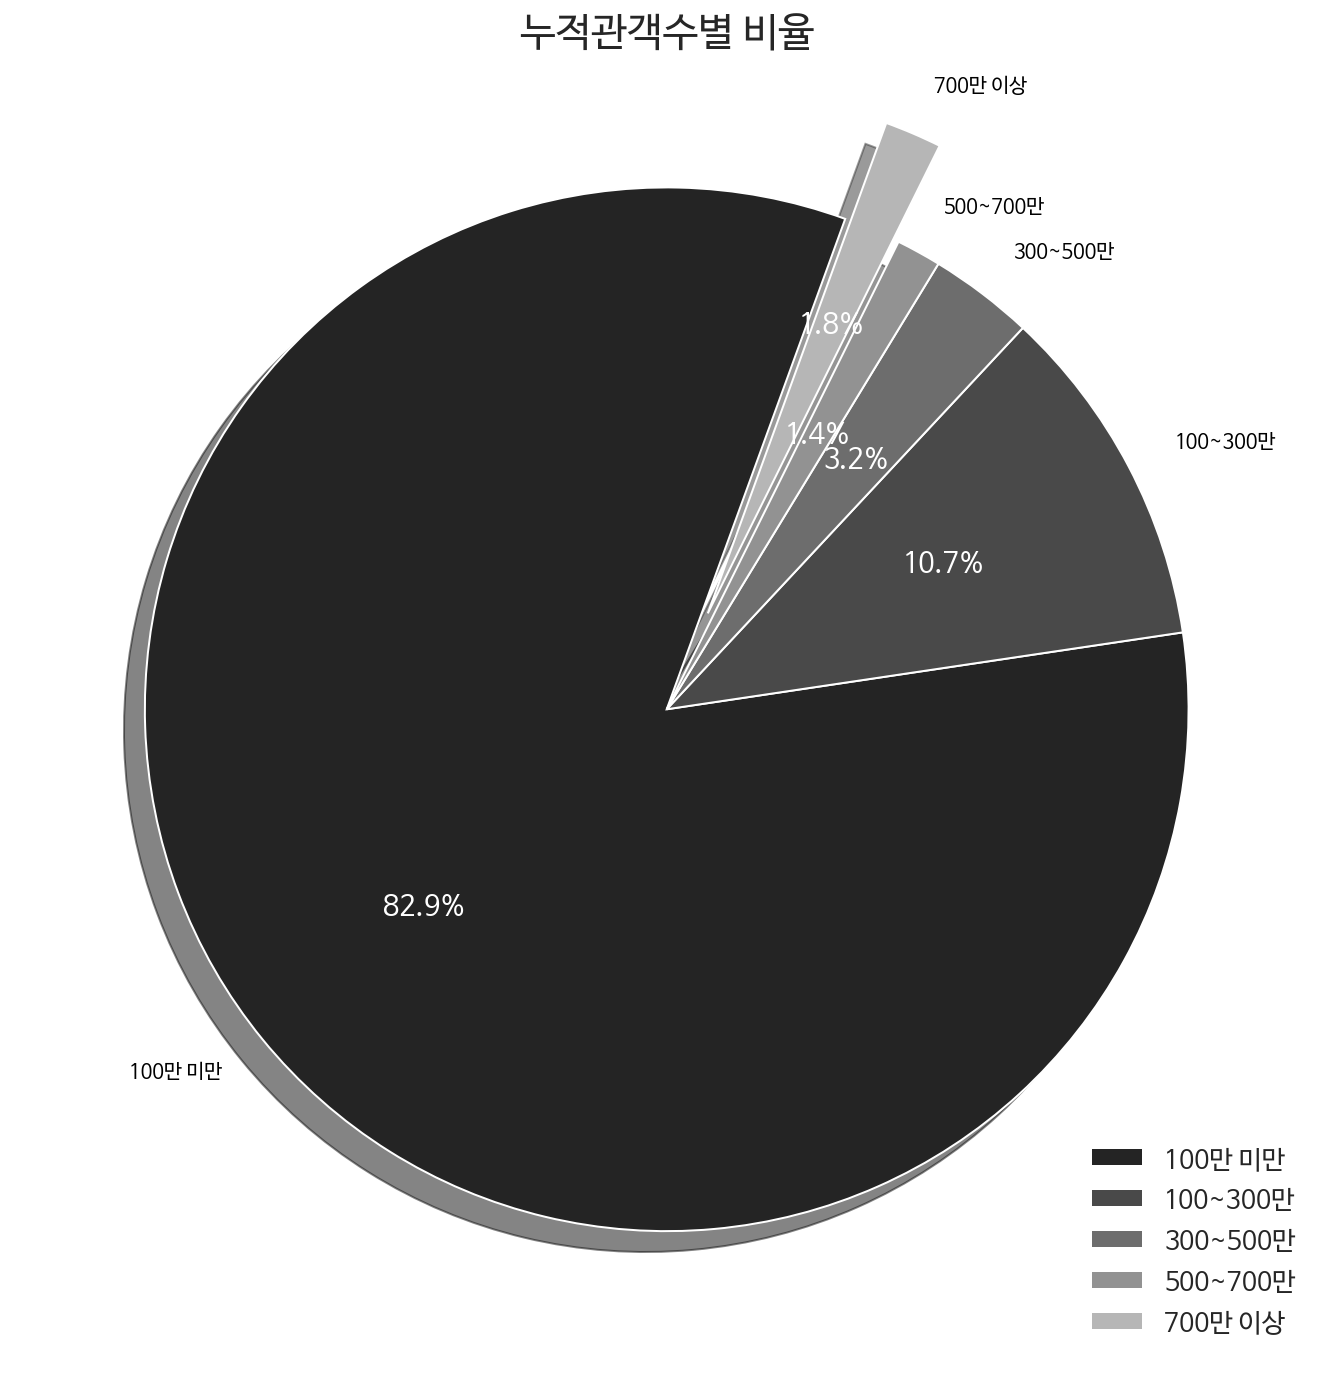

In [151]:
# 파이차트
plt.rc('font', family='NanumBarunGothic')

plt.figure(figsize=(12, 12))

colors = sns.color_palette("binary_r",6)

labels = ['100만 미만', '100~300만', '300~500만', '500~700만', '700만 이상']

sizes = df1_1['ratio']

explode = (0,0,0,0,0.2)

patches, texts, autotexts = plt.pie(
    sizes,
    explode=explode,
    labels=labels,
    autopct="%1.1f%%",
    colors=colors,
    shadow=True,
    startangle=70
)

# label 텍스트 스타일링
for t in texts:
  t.set_fontsize(10)
  t.set_color('black')

# pie 위의 텍스트에 대한 스타일링
for t in autotexts:
  t.set_fontsize(14)
  t.set_color('white')
  
plt.title("누적관객수별 비율", fontsize = 20)
plt.legend(labels,loc='lower right', frameon=False, fontsize = 13)
plt.show()

# 개봉시기는 흥행요소에 영향을 끼치는지

## 분석1-1
- 연도 별로 보았을 때 어떠한 달에 영화들이 흥행하는 지 살펴보고
- 특정한 달( 1-3월 기간)이 있다면 어떠한 이유 때문인가?(연휴, 명절영향)

In [ ]:
df

,title,director,genre,time,country,point,grade,year,date,actor,movie_cd
0,1987,장준환,드라마,129.0,한국,9.23,15세 관람가,2017.0,2017.12.27,김윤석/하정우/유해진/김태리/박희순/이희준/유승목/현봉식/박지환/이용직/박지홍/김경...,20170590
1,1급기밀,홍기선,드라마,101.0,한국,8.89,12세 관람가,2018.0,2018.01.24,김상경/김옥빈/최무성/최귀화/김병철/서현우/황보라/김경남/이항나/이지원/지건우/성병...,20168161
2,48미터,민백두,드라마,97.0,한국,8.94,15세 관람가,2013.0,2013.07.04,박효주/이진희/하석/조한철/안세호/주민하/김용진/지안/김광현/강윤서,20120801
3,4등,정지우,드라마,116.0,한국,8.56,15세 관람가,2016.0,2016.04.13,박해준/이항나/유재상/최무성/정가람/유재명/곽민석/서환희/남문철,20145182
4,82년생 김지영,김도영,드라마,118.0,한국,6.68,12세 관람가,2019.0,2019.10.23,정유미/공유/김미경/공민정/박성연/이봉련/김성철/이얼/김미경/손성찬/강애심/류아영/김정영,20191029
...,...,...,...,...,...,...,...,...,...,...,...
688,희생부활자,곽경택,미스터리,91.0,한국,6.02,15세 관람가,2017.0,2017.10.12,김래원/김해숙/성동일/전혜진/장영남/김민준/정기섭/오대환/전광진/백봉기/이준혁/김주...,20154907
689,서부전선,천성일,전쟁,112.0,한국,6.37,12세 관람가,2015.0,2015.09.24,설경구/여진구/이경영/정성화/정인기/조희봉/김원해/정석원/김선영/노영학/강윤제/한철...,20140193
690,인천상륙작전,이재한,전쟁,110.0,한국,8.04,12세 관람가,2016.0,2016.07.27,이정재/이범수/리암 니슨/진세연/정준호/박철민/김병옥/존 그리스/길금성/신수항/김희...,20156250
691,인천상륙작전 : 익스텐디드 에디션(확장판),이재한,전쟁,141.0,한국,6.92,15세 관람가,2016.0,2016.09.13,이정재/이범수/리암 니슨/진세연/정준호/박철민/김병옥/존 그리스/길금성/신수항/김희...,20160041


In [ ]:
df1

,날짜,영화제목,영화코드,일일 관객수,누적 관객수,전일 대비 증감분,일일 매출액,누적 매출액,일일 상영 스크린수,일일 상영횟수,누적Level
0,20220531,범죄도시 2,20204548,265350,7013525,63932,2642772620,72495151380,0.0,0.0,5
1,20220531,닥터 스트레인지: 대혼돈의 멀티버스,20212855,30422,5803776,11450,318679710,61798271700,0.0,0.0,4
2,20220531,그대가 조국,20224634,17310,189737,2416,169236980,1801689510,0.0,0.0,1
3,20220531,피는 물보다 진하다,20224304,2424,12212,1224,13320500,78773100,0.0,0.0,1
4,20220531,안녕하세요,20217334,2323,19498,1325,17312400,148485860,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
41664,20120115,프렌즈: 몬스터섬의비밀,20113271,15973,498686,-369,115313500,3662498000,189.0,387.0,1
41708,20120111,다크아워,20113652,4931,142322,-5507,37259500,1165058500,215.0,650.0,1
41741,20120108,극장판 포켓몬스터 베스트 위시「비크티니와 백의 영웅 레시라무」,20112709,12541,349214,-3789,86262000,2314523500,152.0,243.0,1
41784,20120104,앨빈과 슈퍼밴드3,20113311,5339,536791,-2595,34123500,3547001000,124.0,247.0,1


In [ ]:
# 흥행의 기준은
# 레벨5인 700만 이상만 잡기엔 부족하니
# 레벨 4까지를 흥행의 기준으로 잡기
# 레벨4 + 레벨5 : 흥행의 기준
df1_1

,level,ratio,count
0,1,82.91,2203
1,2,10.69,284
2,3,3.24,86
3,4,1.39,37
4,5,1.77,47


### 개봉일 기준

In [ ]:
# 누적레벨 전부 다 보면
f = df1.copy()
d = df.loc[:,['movie_cd','date']]

d.rename(
    columns={
        'movie_cd' : '영화코드',
        'date' : '개봉일'
        },
    inplace = True
)

df2_1 = pd.merge(d,f, on='영화코드', how='inner')
df2_1

,영화코드,개봉일,날짜,영화제목,일일 관객수,누적 관객수,전일 대비 증감분,일일 매출액,누적 매출액,일일 상영 스크린수,일일 상영횟수,누적Level
0,20170590,2017.12.27,20180207,1987,9410,7201087,1549,68214600,57934612645,405.0,709.0,5
1,20168161,2018.01.24,20180131,1급기밀,4322,200090,-11072,26619000,1592776900,168.0,279.0,1
2,20120801,2013.07.04,20130709,48미터,1127,5907,415,8366500,45691500,33.0,93.0,1
3,20145182,2016.04.13,20160418,4등,1260,18049,-2044,8977500,146941500,174.0,381.0,1
4,20191029,2019.10.23,20191203,82년생 김지영,2792,3671152,245,21681220,30244988930,166.0,229.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
688,20154907,2017.10.12,20171018,희생부활자,18054,300737,-3638,129406600,2356707035,606.0,2352.0,1
689,20140193,2015.09.24,20151008,서부전선,2452,599698,-4219,17642500,4683618500,100.0,134.0,1
690,20156250,2016.07.27,20160906,인천상륙작전,4460,7043241,-964,31154500,55062816503,288.0,565.0,5
691,20160041,2016.09.13,20160919,인천상륙작전 : 익스텐디드 에디션(확장판),853,24710,-1425,5915000,204619700,99.0,171.0,1


In [ ]:
df2_1.groupby('누적Level')[['영화코드']].count()

,영화코드
누적Level,
1,468
2,137
3,39
4,18
5,31


In [ ]:
# 개봉일을 날짜 데이터와 동일한 형식으로

a_lst = []

for a in df2_1['개봉일']:
  a = a.replace('.','')
  a_lst.append(a)

df2_1['개봉일'] = a_lst
df2_1['개봉일']

0      20171227
1      20180124
2      20130704
3      20160413
4      20191023
         ...   
688    20171012
689    20150924
690    20160727
691    20160913
692    20190925
Name: 개봉일, Length: 693, dtype: object

In [ ]:
# 날짜 컬럼명을 마지막 상영일로 변경하기
df2_1.rename(columns={'날짜' : '마지막상영일'}, inplace = True)
df2_1

,영화코드,개봉일,마지막상영일,영화제목,일일 관객수,누적 관객수,전일 대비 증감분,일일 매출액,누적 매출액,일일 상영 스크린수,일일 상영횟수,누적Level
0,20170590,20171227,20180207,1987,9410,7201087,1549,68214600,57934612645,405.0,709.0,5
1,20168161,20180124,20180131,1급기밀,4322,200090,-11072,26619000,1592776900,168.0,279.0,1
2,20120801,20130704,20130709,48미터,1127,5907,415,8366500,45691500,33.0,93.0,1
3,20145182,20160413,20160418,4등,1260,18049,-2044,8977500,146941500,174.0,381.0,1
4,20191029,20191023,20191203,82년생 김지영,2792,3671152,245,21681220,30244988930,166.0,229.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
688,20154907,20171012,20171018,희생부활자,18054,300737,-3638,129406600,2356707035,606.0,2352.0,1
689,20140193,20150924,20151008,서부전선,2452,599698,-4219,17642500,4683618500,100.0,134.0,1
690,20156250,20160727,20160906,인천상륙작전,4460,7043241,-964,31154500,55062816503,288.0,565.0,5
691,20160041,20160913,20160919,인천상륙작전 : 익스텐디드 에디션(확장판),853,24710,-1425,5915000,204619700,99.0,171.0,1


In [ ]:
df2_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 693 entries, 0 to 692
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   영화코드        693 non-null    int64  
 1   개봉일         693 non-null    object 
 2   마지막상영일      693 non-null    object 
 3   영화제목        693 non-null    object 
 4   일일 관객수      693 non-null    int64  
 5   누적 관객수      693 non-null    int64  
 6   전일 대비 증감분   693 non-null    int64  
 7   일일 매출액      693 non-null    int64  
 8   누적 매출액      693 non-null    int64  
 9   일일 상영 스크린수  693 non-null    float64
 10  일일 상영횟수     693 non-null    float64
 11  누적Level     693 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 70.4+ KB


In [ ]:
gddoj = '20171227'
gddoj[4:6]

'12'

In [ ]:
# 날짜 파싱하려는데 자꾸 day is out of range for month: 0 로 뜸.
# 해당월의 최대일수를 넘은게 있는지 확인
# 제일 유력후보는 2월
# 2월 부터 확인

p_lst = []

for p in df2_1['개봉일']:
  if (p[4:] >= '0201') & (p[4:] < '0301'):
    p = pd.to_datetime(p)
    p_lst.append(p)

  else:
    pass

p_lst

[Timestamp('2021-02-18 00:00:00'),
 Timestamp('2021-02-24 00:00:00'),
 Timestamp('2014-02-13 00:00:00'),
 Timestamp('2022-02-24 00:00:00'),
 Timestamp('2016-02-24 00:00:00'),
 Timestamp('2017-02-15 00:00:00'),
 Timestamp('2013-02-06 00:00:00'),
 Timestamp('2021-02-17 00:00:00'),
 Timestamp('2016-02-17 00:00:00'),
 Timestamp('2014-02-06 00:00:00'),
 Timestamp('2018-02-28 00:00:00'),
 Timestamp('2021-02-18 00:00:00'),
 Timestamp('2016-02-24 00:00:00'),
 Timestamp('2014-02-13 00:00:00'),
 Timestamp('2017-02-22 00:00:00'),
 Timestamp('2021-02-10 00:00:00'),
 Timestamp('2019-02-27 00:00:00'),
 Timestamp('2017-02-15 00:00:00'),
 Timestamp('2019-02-13 00:00:00'),
 Timestamp('2019-02-27 00:00:00'),
 Timestamp('2018-02-14 00:00:00'),
 Timestamp('2016-02-11 00:00:00'),
 Timestamp('2016-02-25 00:00:00'),
 Timestamp('2013-02-14 00:00:00'),
 Timestamp('2012-02-29 00:00:00'),
 Timestamp('2021-02-10 00:00:00'),
 Timestamp('2015-02-05 00:00:00'),
 Timestamp('2019-02-27 00:00:00'),
 Timestamp('2022-02-

2월은 문제없음. 그렇다면 다음 유력후보는 day가 31이거나 30일 인거?

In [ ]:
# day가 30일 이거나 31일인것들중 에러 확인
p_lst = []

for p in df2_1['개봉일']:
  if (p[6:] >= '30'):
    p = pd.to_datetime(p)
    p_lst.append(p)

  else:
    pass

p_lst

[Timestamp('2014-12-31 00:00:00'),
 Timestamp('2019-05-30 00:00:00'),
 Timestamp('2017-05-31 00:00:00'),
 Timestamp('2014-10-30 00:00:00'),
 Timestamp('2013-10-30 00:00:00'),
 Timestamp('2012-05-31 00:00:00'),
 Timestamp('2017-05-31 00:00:00'),
 Timestamp('2013-05-30 00:00:00'),
 Timestamp('2020-12-30 00:00:00'),
 Timestamp('2012-10-31 00:00:00'),
 Timestamp('2021-06-30 00:00:00'),
 Timestamp('2021-03-31 00:00:00'),
 Timestamp('2014-04-30 00:00:00'),
 Timestamp('2018-10-31 00:00:00'),
 Timestamp('2021-03-31 00:00:00'),
 Timestamp('2020-04-30 00:00:00'),
 Timestamp('2015-12-30 00:00:00'),
 Timestamp('2020-07-30 00:00:00'),
 Timestamp('2018-05-30 00:00:00'),
 Timestamp('2021-06-30 00:00:00'),
 Timestamp('2012-05-30 00:00:00'),
 Timestamp('2013-10-30 00:00:00'),
 Timestamp('2013-07-31 00:00:00'),
 Timestamp('2021-06-30 00:00:00'),
 Timestamp('2012-08-30 00:00:00'),
 Timestamp('2016-03-30 00:00:00'),
 Timestamp('2017-08-30 00:00:00'),
 Timestamp('2018-01-31 00:00:00'),
 Timestamp('2012-05-

얘도 문제없음...

In [ ]:
df2_1[df2_1['개봉일'] == '0']

,영화코드,개봉일,마지막상영일,영화제목,일일 관객수,누적 관객수,전일 대비 증감분,일일 매출액,누적 매출액,일일 상영 스크린수,일일 상영횟수,누적Level
591,19990140,0,20160510,인생은 아름다워,1442,119841,205,8244300,809673200,72.0,137.0,1


얘 때문에 날짜 파싱 계속 오류났었음. 이거 지우니까 이제 날짜 파싱 잘됨.

In [ ]:
# 삭제
df2_1 = df2_1.drop(591)

In [ ]:
# 잘 삭제됬는지 확인.
df2_1[df2_1['개봉일'] == '0']

,영화코드,개봉일,마지막상영일,영화제목,일일 관객수,누적 관객수,전일 대비 증감분,일일 매출액,누적 매출액,일일 상영 스크린수,일일 상영횟수,누적Level


In [ ]:
df2_1

,영화코드,개봉일,마지막상영일,영화제목,일일 관객수,누적 관객수,전일 대비 증감분,일일 매출액,누적 매출액,일일 상영 스크린수,일일 상영횟수,누적Level
0,20170590,20171227,20180207,1987,9410,7201087,1549,68214600,57934612645,405.0,709.0,5
1,20168161,20180124,20180131,1급기밀,4322,200090,-11072,26619000,1592776900,168.0,279.0,1
2,20120801,20130704,20130709,48미터,1127,5907,415,8366500,45691500,33.0,93.0,1
3,20145182,20160413,20160418,4등,1260,18049,-2044,8977500,146941500,174.0,381.0,1
4,20191029,20191023,20191203,82년생 김지영,2792,3671152,245,21681220,30244988930,166.0,229.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
688,20154907,20171012,20171018,희생부활자,18054,300737,-3638,129406600,2356707035,606.0,2352.0,1
689,20140193,20150924,20151008,서부전선,2452,599698,-4219,17642500,4683618500,100.0,134.0,1
690,20156250,20160727,20160906,인천상륙작전,4460,7043241,-964,31154500,55062816503,288.0,565.0,5
691,20160041,20160913,20160919,인천상륙작전 : 익스텐디드 에디션(확장판),853,24710,-1425,5915000,204619700,99.0,171.0,1


In [ ]:
# 개봉일, 마지막 상영일 날짜파싱하기
df2_1['개봉일'] = pd.to_datetime(df2_1['개봉일'])
df2_1['마지막상영일'] = pd.to_datetime(df2_1['마지막상영일'])

df2_1

,영화코드,개봉일,마지막상영일,영화제목,일일 관객수,누적 관객수,전일 대비 증감분,일일 매출액,누적 매출액,일일 상영 스크린수,일일 상영횟수,누적Level
0,20170590,2017-12-27,2018-02-07,1987,9410,7201087,1549,68214600,57934612645,405.0,709.0,5
1,20168161,2018-01-24,2018-01-31,1급기밀,4322,200090,-11072,26619000,1592776900,168.0,279.0,1
2,20120801,2013-07-04,2013-07-09,48미터,1127,5907,415,8366500,45691500,33.0,93.0,1
3,20145182,2016-04-13,2016-04-18,4등,1260,18049,-2044,8977500,146941500,174.0,381.0,1
4,20191029,2019-10-23,2019-12-03,82년생 김지영,2792,3671152,245,21681220,30244988930,166.0,229.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
688,20154907,2017-10-12,2017-10-18,희생부활자,18054,300737,-3638,129406600,2356707035,606.0,2352.0,1
689,20140193,2015-09-24,2015-10-08,서부전선,2452,599698,-4219,17642500,4683618500,100.0,134.0,1
690,20156250,2016-07-27,2016-09-06,인천상륙작전,4460,7043241,-964,31154500,55062816503,288.0,565.0,5
691,20160041,2016-09-13,2016-09-19,인천상륙작전 : 익스텐디드 에디션(확장판),853,24710,-1425,5915000,204619700,99.0,171.0,1


In [ ]:
df2_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 692 entries, 0 to 692
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   영화코드        692 non-null    int64         
 1   개봉일         692 non-null    datetime64[ns]
 2   마지막상영일      692 non-null    datetime64[ns]
 3   영화제목        692 non-null    object        
 4   일일 관객수      692 non-null    int64         
 5   누적 관객수      692 non-null    int64         
 6   전일 대비 증감분   692 non-null    int64         
 7   일일 매출액      692 non-null    int64         
 8   누적 매출액      692 non-null    int64         
 9   일일 상영 스크린수  692 non-null    float64       
 10  일일 상영횟수     692 non-null    float64       
 11  누적Level     692 non-null    int64         
dtypes: datetime64[ns](2), float64(2), int64(7), object(1)
memory usage: 70.3+ KB


### 시각화 전 전처리

In [ ]:
# 개봉일 기준으로 확인해보기
df2_1_copy = df2_1.copy()
df2_1_copy['year1'] = df2_1_copy['개봉일'].dt.year

# df2_1_copy['month1'] = df2_1_copy['개봉일'].dt.month 이렇게 하면 자료형이 int 형으로 나오는데 시각화할때 값이 없는 컬럼들도 자동으로 생김.
# 따라서 month1을 문자형 자료로 만들어야될때 밑에 for문 사용
# c_ist = []
# for cc in df2_1_copy['개봉일']:
#   c = cc.strftime('%m')
#   c_ist.append(c)

df2_1_copy['month1'] = df2_1_copy['개봉일'].dt.month
df2_1_1 = df2_1_copy.groupby(['year1','month1', '누적Level'])[['영화코드']].count().reset_index()
df2_1_1

,year1,month1,누적Level,영화코드
0,2012,1,1,2
1,2012,1,3,2
2,2012,2,1,1
3,2012,2,2,2
4,2012,3,1,4
...,...,...,...,...
283,2022,3,1,4
284,2022,4,1,9
285,2022,5,1,4
286,2022,5,5,1


In [ ]:
df2_1_copy.groupby(['year1','month1', '누적Level'])[['영화코드']].count()

영화코드
year1 month1 누적Level      
2012  1      1           2
             3           2
      2      1           1
             2           2
      3      1           4
...                    ...
2022  3      1           4
      4      1           9
      5      1           4
             5           1
      6      1           4

[288 rows x 1 columns]

In [ ]:
df2_1_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   year1    288 non-null    int64
 1   month1   288 non-null    int64
 2   누적Level  288 non-null    int64
 3   영화코드     288 non-null    int64
dtypes: int64(4)
memory usage: 9.1 KB


## 분석1-1 시각화

### 개봉일자 기준

#### 시각화 : 흥행영화(누적 관객수 500만 이상)들의 영화개봉 시기

In [ ]:
df2_1_opendate_45 = df2_1_1[(df2_1_1['누적Level'] == 4) | (df2_1_1['누적Level'] == 5)]
df2_1_opendate_45 = df2_1_opendate_45.groupby('month1')['영화코드'].sum().reset_index()
df2_1_opendate_45

,month1,영화코드
0,1,6
1,2,1
2,5,3
3,6,2
4,7,9
5,8,9
6,9,5
7,10,3
8,11,2
9,12,9


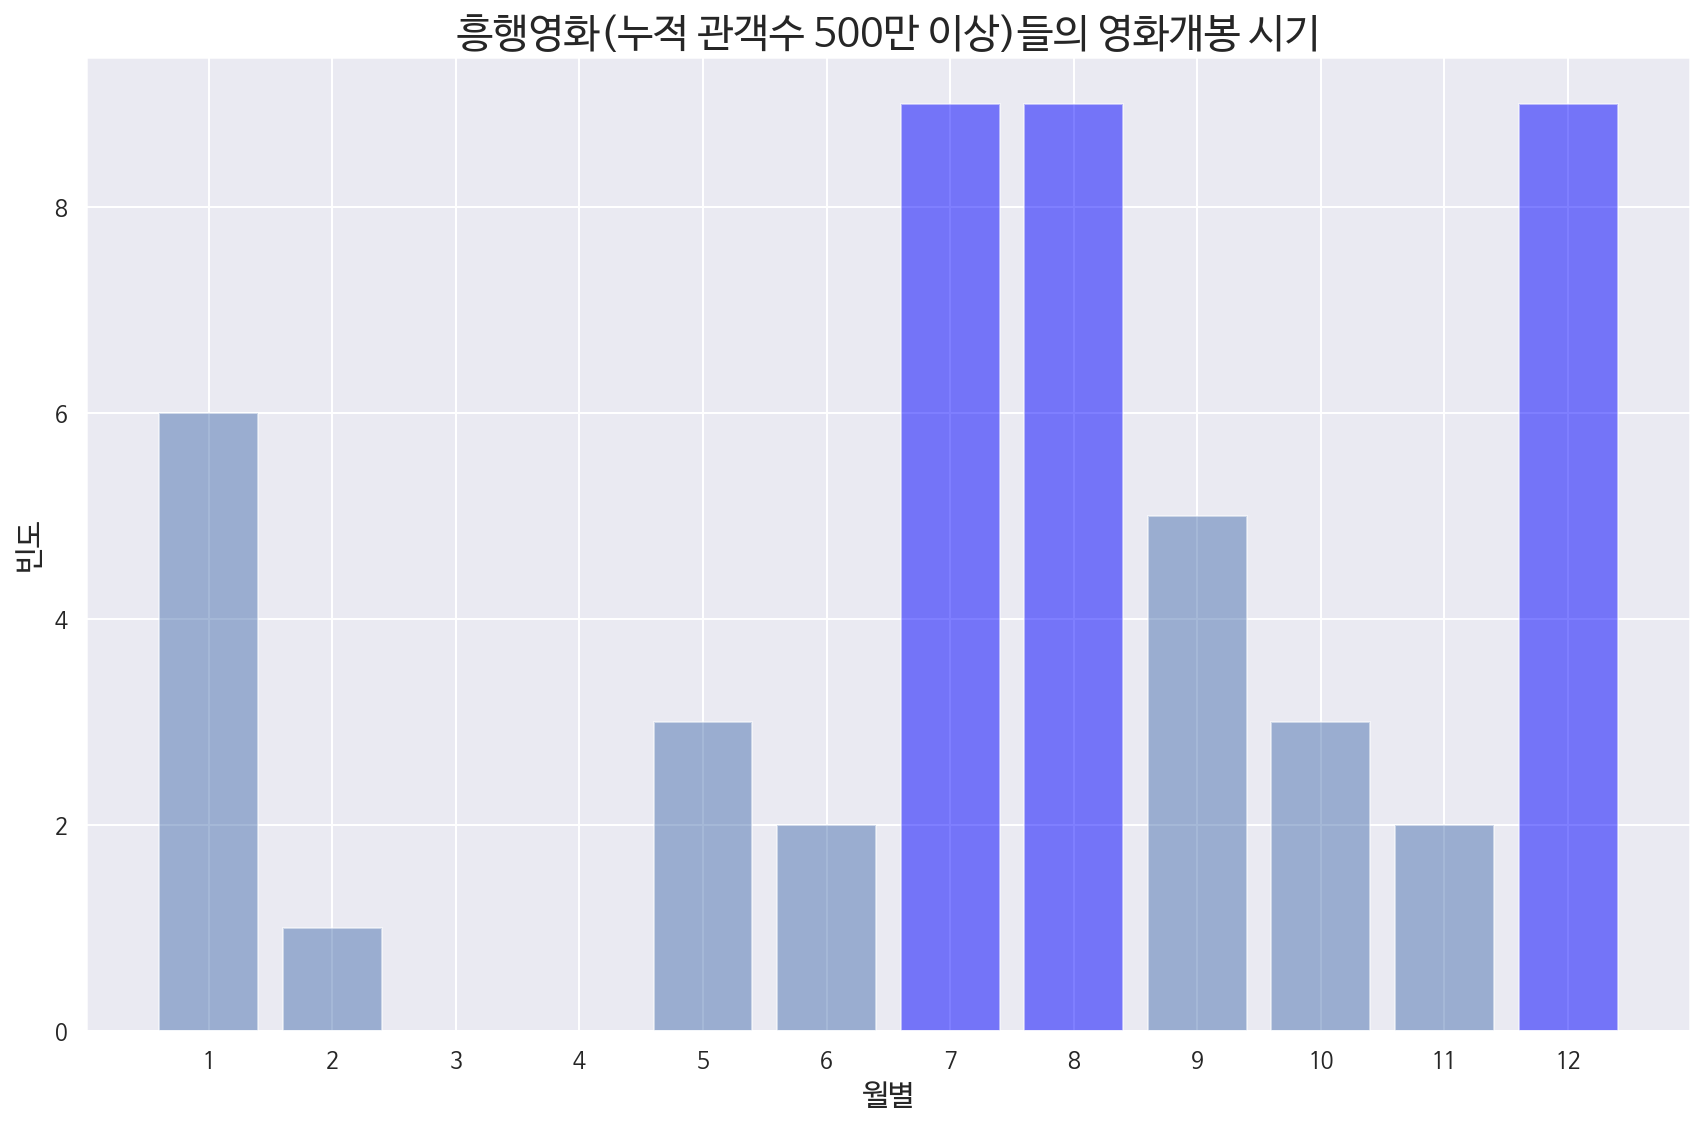

In [ ]:
# 시각화
plt.rc('font', family='NanumBarunGothic')

plt.figure(figsize = (12,8))

x = df2_1_opendate_45['month1']
y = df2_1_opendate_45['영화코드']

colors = ['b' for _ in range(len(x))]
colors[4] = 'blue'
colors[5] = 'blue' 
colors[9] = 'blue' 

plt.bar(x, y, color = colors, alpha=0.5)

plt.xlabel('월별', fontsize=15)
plt.xticks(ticks=[1,2,3,4,5,6,7,8,9,10,11,12])

plt.ylabel('빈도',fontsize=15)
plt.title('흥행영화(누적 관객수 500만 이상)들의 영화개봉 시기',fontsize = 20)

plt.tight_layout()
plt.show()

- 3,4월은 피하는 경우가 많다. 
- 여름방학, 여름휴가 기간인 7,8월이 가장 많다.
- 7,8월 만큼 많은건 연말인 12월이다.
- 흥행영화(500만 이상)들의 개봉시기 선택은 7,8,12월이다.

#### 시각화 : 흥행저조 영화(누적 관객수 100만 미만)들의 영화개봉 시기

In [ ]:
df2_1_opendate_1 = df2_1_1[df2_1_1['누적Level'] == 1]
df2_1_opendate_1 = df2_1_opendate_1.groupby('month1')['영화코드'].sum().reset_index()
df2_1_opendate_1

,month1,영화코드
0,1,35
1,2,34
2,3,38
3,4,48
4,5,41
5,6,43
6,7,31
7,8,26
8,9,40
9,10,48


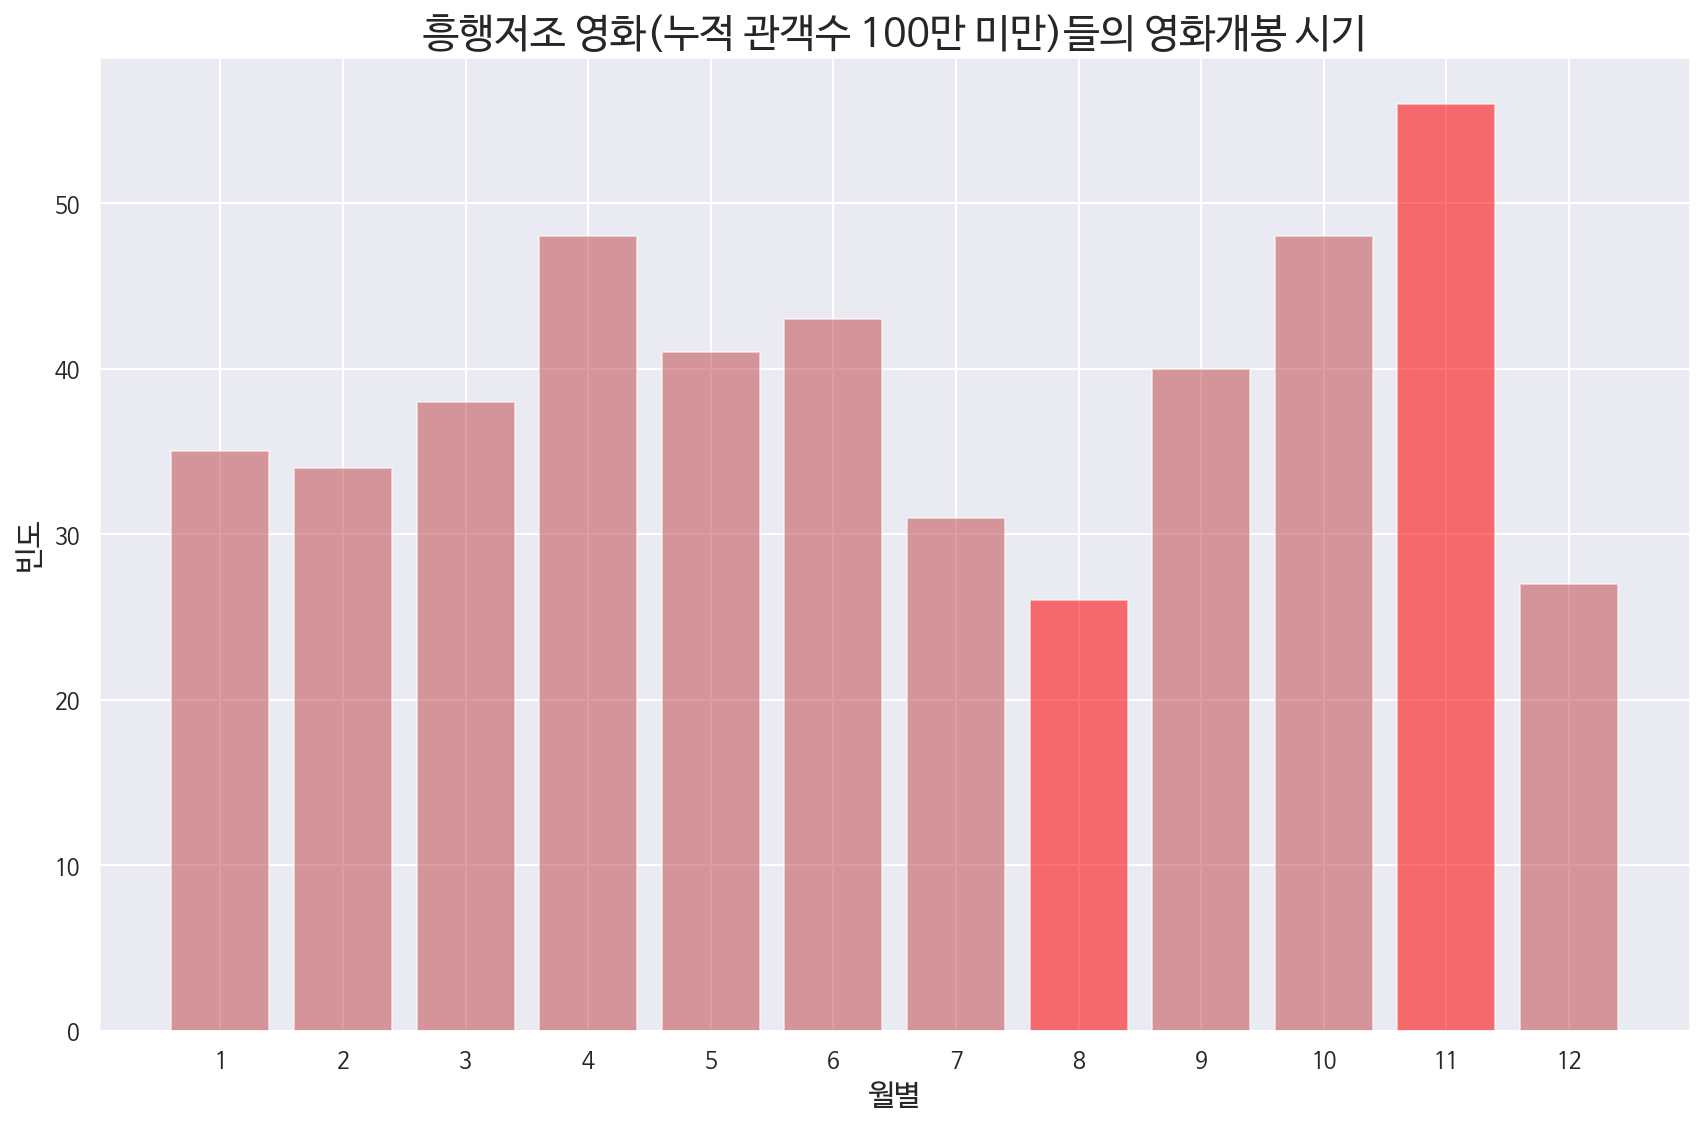

In [ ]:
# 시각화
plt.rc('font', family='NanumBarunGothic')

plt.figure(figsize = (12,8))

x = df2_1_opendate_1['month1']
y = df2_1_opendate_1['영화코드']

colors = ['r' for _ in range(len(x))]
colors[7] = 'red'
colors[10] = 'red' 

plt.bar(x, y, color = colors, alpha=0.55)

plt.xlabel('월별', fontsize=15)
plt.xticks(ticks=[1,2,3,4,5,6,7,8,9,10,11,12])

plt.ylabel('빈도',fontsize=15)
plt.title('흥행저조 영화(누적 관객수 100만 미만)들의 영화개봉 시기',fontsize = 20)

plt.tight_layout()
plt.show()

- 8월이 가장 적다.
  - 흥행에 성공한 영화들과는 다르다.
  - 개봉전부터 유명한 영화들과의 경쟁을 피하기위한 선택으로 보인다.
- 가장 높은 빈도를 보이는건 11월, 그 다음은 4월,10월.
  - 이것도 역시 경쟁을 피하기위한것으로 보인다.
  - 흥행에 자신있는 영화들은 3,4월은 피하는 경향이 보이는데 흥행에 자신이 없는 영화들은 3,4월에 영화를 개봉해 틈새시장을 노리는것같은 행보를 보인다.
  - 10월과 11월 역시 연말을 노렸다기엔 조금 이른감이 있는데 이것도 위에서 적은대로 흥행에 자신있는 영화들이 연말에 쏟아져나오기때문에 12월 전인 10,11월에 개봉을 하는것으로 보이기도 한다.
  

#### 시각화 : 

In [ ]:
df2_1_1

,year1,month1,누적Level,영화코드
0,2012,1,1,2
1,2012,1,3,2
2,2012,2,1,1
3,2012,2,2,2
4,2012,3,1,4
...,...,...,...,...
283,2022,3,1,4
284,2022,4,1,9
285,2022,5,1,4
286,2022,5,5,1


In [ ]:
df2_1_opendate_12345 = df2_1_1.groupby(['month1','누적Level'])[['영화코드']].sum().reset_index()
df2_1_opendate_12345

,month1,누적Level,영화코드
0,1,1,35
1,1,2,11
2,1,3,5
3,1,4,1
4,1,5,5
5,2,1,34
6,2,2,15
7,2,3,2
8,2,5,1
9,3,1,38


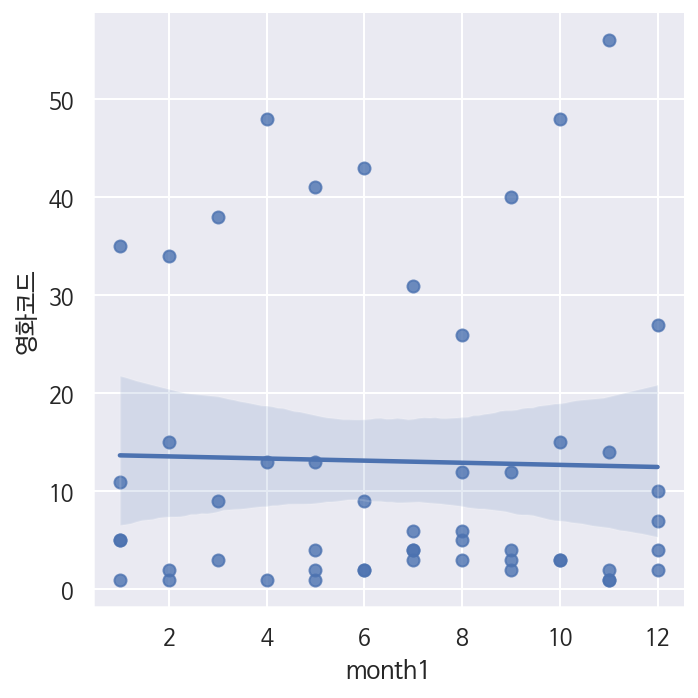

In [ ]:
# 월별 누적 level과의 상관관계 -> lmplot
sns.lmplot(x='month1', y='영화코드', height=5, data=df2_1_opendate_12345)
# plt.ylim(0,150)
plt.show()

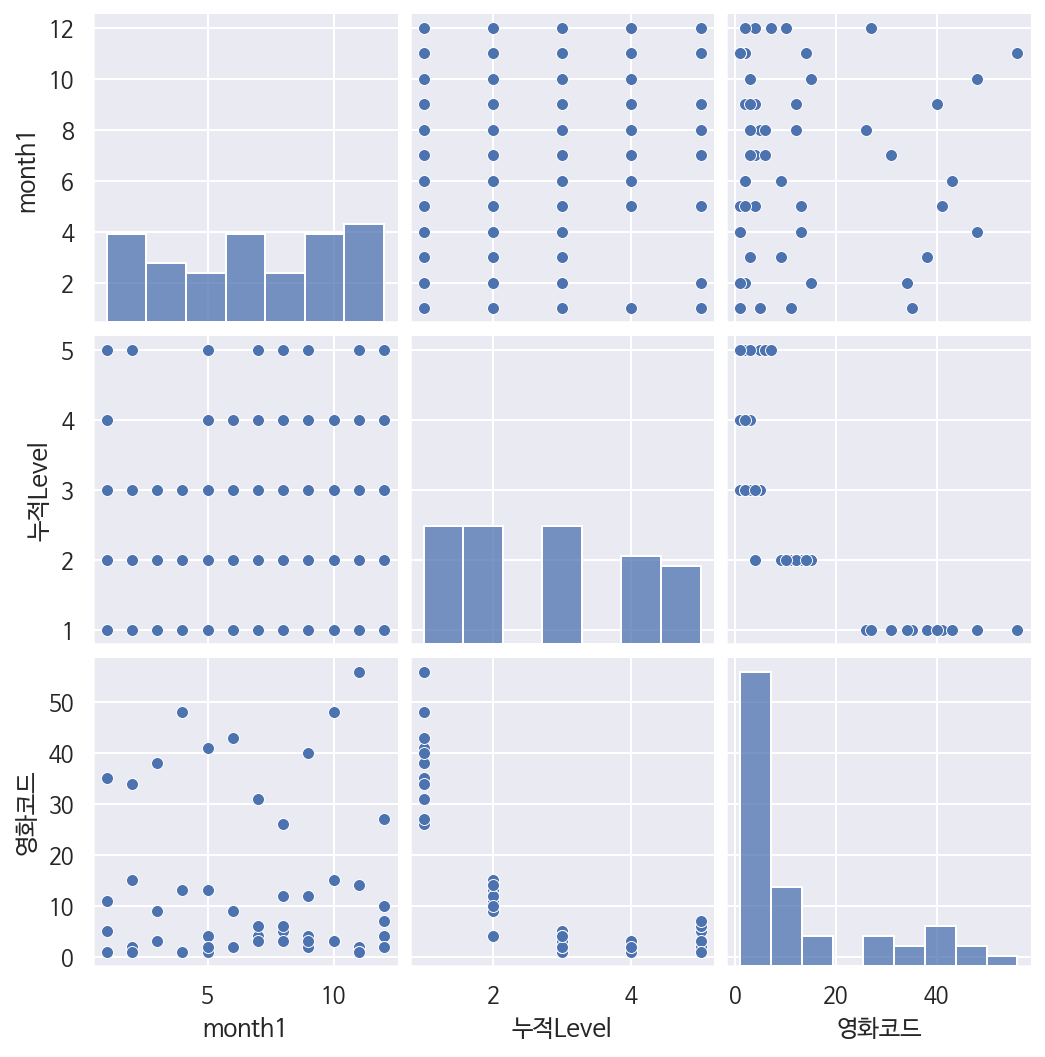

In [ ]:
sns.pairplot(df2_1_opendate_12345)
plt.show()

In [152]:
# # 데이터 수정해야됨.
# plt.figure(figsize = (15,8))
# sns.countplot(y='month1', hue='누적Level', data=df2_1_opendate_12345)
# plt.xlabel('빈도수', fontsize=15)
# plt.ylabel('월별(3월,4월 = 0)',fontsize=15)
# # plt.yticks(ticks=[1,2,3,4,5,6,7,8,9,10,11,12])
# plt.title('월평균 누적관객수 500만 이상 흥행한 빈도(2012~2022)',fontsize = 20)
# plt.tight_layout()
# plt.show()

## 분석 1-2
- 코로나시국은 전체적으로 관객수가 줄어든 것을 증명
- 시기가 중요한 것을 증명

### 개봉일 기준
- 사회적 거리두기 첫 시행일은 2020.02.29 인데 첫 시행기간은 그렇게 규제가 강하지않아서 영화관 흥행에 영향을 줄 정도는 아니라고 생각됨.
- 사회적 거리두기가 강화된 2020.03.22 부터를 사회적 거리두기와 코로나로 인한 영화관 규제 기간으로 정의하고
- 2022.04.18 사회적 거리두기 해제
- 따라서 2020.04월~ 2022.03 으로 기간을 잡아서 확인

### 시각화 전 전처리

In [ ]:
df2_1_1[df2_1_1['year1'] > 2019].reset_index(drop=True)

,year1,month1,누적Level,영화코드
0,2020,1,1,2
1,2020,1,2,2
2,2020,1,3,1
3,2020,2,1,1
4,2020,2,2,2
5,2020,3,1,1
6,2020,4,1,3
7,2020,5,1,3
8,2020,5,3,1
9,2020,6,1,3


In [ ]:
# 사회적 거리두기 기간만 모아두기

df2_2 = df2_1_1[df2_1_1['year1'] > 2019].reset_index(drop=True)
df2_2 = df2_2.drop([0,1,2,3,4,5,43,44,45,46]).reset_index(drop=True)
df2_2

,year1,month1,누적Level,영화코드
0,2020,4,1,3
1,2020,5,1,3
2,2020,5,3,1
3,2020,6,1,3
4,2020,6,2,1
5,2020,7,1,2
6,2020,7,2,1
7,2020,7,3,1
8,2020,8,1,2
9,2020,8,2,1


## 분석 1-2 시각화

### 개봉일자 기준

#### 시각화 : 사회적거리두기 기간(2020.04-2022.03) 영화 흥행정도

In [ ]:
df2_2_covid = df2_2.groupby('누적Level')[['영화코드']].sum().reset_index()
df2_2_covid

,누적Level,영화코드
0,1,111
1,2,10
2,3,4


In [ ]:
# 각각 비율구해서 컬럼추가
df2_2_covid['비율'] = df2_2_covid['영화코드'] / df2_2_covid['영화코드'].sum() * 100
df2_2_covid

,누적Level,영화코드,비율
0,1,111,88.8
1,2,10,8.0
2,3,4,3.2


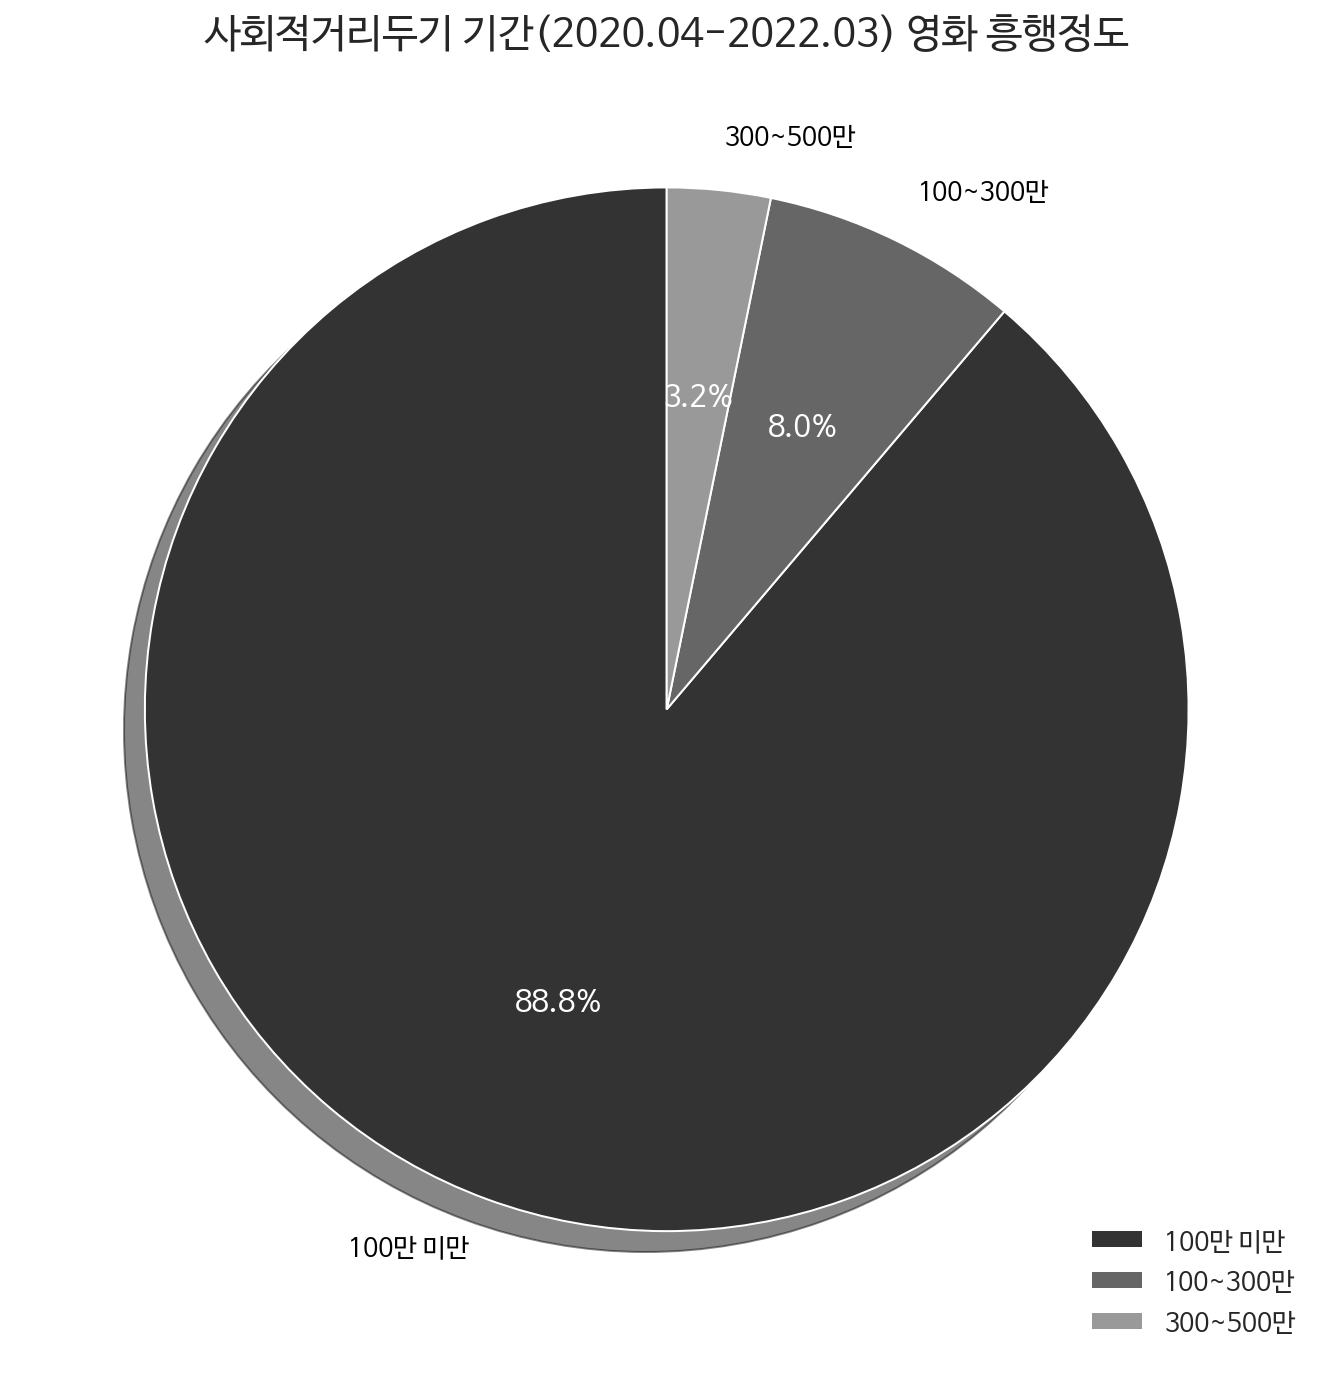

In [150]:
# 파이차트
plt.rc('font', family='NanumBarunGothic')

plt.figure(figsize=(12, 12))

colors = sns.color_palette("binary_r",4)

labels = ['100만 미만', '100~300만', '300~500만']

sizes = df2_2_covid['비율']
explode = (0,0,0)

patches, texts, autotexts = plt.pie(
    sizes,
    explode=explode,
    labels=labels,
    autopct="%1.1f%%",
    colors=colors,
    shadow=True,
    startangle=90
)

# label 텍스트 스타일링
for t in texts:
  t.set_fontsize(13)
  t.set_color('black')

# pie 위의 텍스트에 대한 스타일링
for t in autotexts:
  t.set_fontsize(15)
  t.set_color('white')
  
plt.title("사회적거리두기 기간(2020.04-2022.03) 영화 흥행정도", fontsize = 20)
plt.legend(labels,loc='lower right', frameon=False, fontsize = 13)
plt.show()

- 코로나 발생기간(2020.04~2022.03)에는 500만 이상으로 흥행한 영화가 하나도 없었다. 
- 코로나 기간동안에 100만 미만의 누적관객수를 보유한 영화의 비율이 약 89% 정도이다.
  - 코로나 기간에는 대부분의 영화가 흥행실패 했다는 의미.

#### 시각화 : 

# 흥행한 영화들의 상영시간

## 분석2
- 흥행한 영화들의 평균 상영시간은 몇 분인가?
- 부분으로하고, 전체로도
- 특정 시간을 넘어가면 보지않는다 -> 몇분부터인가?

In [ ]:
df

,title,director,genre,time,country,point,grade,year,date,actor,movie_cd
0,1987,장준환,드라마,129.0,한국,9.23,15세 관람가,2017.0,2017.12.27,김윤석/하정우/유해진/김태리/박희순/이희준/유승목/현봉식/박지환/이용직/박지홍/김경...,20170590
1,1급기밀,홍기선,드라마,101.0,한국,8.89,12세 관람가,2018.0,2018.01.24,김상경/김옥빈/최무성/최귀화/김병철/서현우/황보라/김경남/이항나/이지원/지건우/성병...,20168161
2,48미터,민백두,드라마,97.0,한국,8.94,15세 관람가,2013.0,2013.07.04,박효주/이진희/하석/조한철/안세호/주민하/김용진/지안/김광현/강윤서,20120801
3,4등,정지우,드라마,116.0,한국,8.56,15세 관람가,2016.0,2016.04.13,박해준/이항나/유재상/최무성/정가람/유재명/곽민석/서환희/남문철,20145182
4,82년생 김지영,김도영,드라마,118.0,한국,6.68,12세 관람가,2019.0,2019.10.23,정유미/공유/김미경/공민정/박성연/이봉련/김성철/이얼/김미경/손성찬/강애심/류아영/김정영,20191029
...,...,...,...,...,...,...,...,...,...,...,...
688,희생부활자,곽경택,미스터리,91.0,한국,6.02,15세 관람가,2017.0,2017.10.12,김래원/김해숙/성동일/전혜진/장영남/김민준/정기섭/오대환/전광진/백봉기/이준혁/김주...,20154907
689,서부전선,천성일,전쟁,112.0,한국,6.37,12세 관람가,2015.0,2015.09.24,설경구/여진구/이경영/정성화/정인기/조희봉/김원해/정석원/김선영/노영학/강윤제/한철...,20140193
690,인천상륙작전,이재한,전쟁,110.0,한국,8.04,12세 관람가,2016.0,2016.07.27,이정재/이범수/리암 니슨/진세연/정준호/박철민/김병옥/존 그리스/길금성/신수항/김희...,20156250
691,인천상륙작전 : 익스텐디드 에디션(확장판),이재한,전쟁,141.0,한국,6.92,15세 관람가,2016.0,2016.09.13,이정재/이범수/리암 니슨/진세연/정준호/박철민/김병옥/존 그리스/길금성/신수항/김희...,20160041


In [ ]:
df[df['date'] == '0']

,title,director,genre,time,country,point,grade,year,date,actor,movie_cd
591,인생은 아름다워,최국희,뮤지컬,122.0,한국,0.0,12세 관람가,2022.0,0,류승룡/염정아/박세완/옹성우,19990140


In [ ]:
df = df.drop(591)

In [ ]:
df[df['date'] == '0']

,title,director,genre,time,country,point,grade,year,date,actor,movie_cd


In [ ]:
df1

,날짜,영화제목,영화코드,일일 관객수,누적 관객수,전일 대비 증감분,일일 매출액,누적 매출액,일일 상영 스크린수,일일 상영횟수,누적Level
0,20220531,범죄도시 2,20204548,265350,7013525,63932,2642772620,72495151380,0.0,0.0,5
1,20220531,닥터 스트레인지: 대혼돈의 멀티버스,20212855,30422,5803776,11450,318679710,61798271700,0.0,0.0,4
2,20220531,그대가 조국,20224634,17310,189737,2416,169236980,1801689510,0.0,0.0,1
3,20220531,피는 물보다 진하다,20224304,2424,12212,1224,13320500,78773100,0.0,0.0,1
4,20220531,안녕하세요,20217334,2323,19498,1325,17312400,148485860,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
41664,20120115,프렌즈: 몬스터섬의비밀,20113271,15973,498686,-369,115313500,3662498000,189.0,387.0,1
41708,20120111,다크아워,20113652,4931,142322,-5507,37259500,1165058500,215.0,650.0,1
41741,20120108,극장판 포켓몬스터 베스트 위시「비크티니와 백의 영웅 레시라무」,20112709,12541,349214,-3789,86262000,2314523500,152.0,243.0,1
41784,20120104,앨빈과 슈퍼밴드3,20113311,5339,536791,-2595,34123500,3547001000,124.0,247.0,1


In [ ]:
# df1 에서 누적레벨 가져와서 df와 합치기
df3 = df1[['영화코드', '누적Level']]
df3.rename(columns={'영화코드' : 'movie_cd'}, inplace = True)
df3

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,movie_cd,누적Level
0,20204548,5
1,20212855,4
2,20224634,1
3,20224304,1
4,20217334,1
...,...,...
41664,20113271,1
41708,20113652,1
41741,20112709,1
41784,20113311,1


In [ ]:
f = df.copy()
df3 = pd.merge(df3,f, on='movie_cd', how='inner')
df3

,movie_cd,누적Level,title,director,genre,time,country,point,grade,year,date,actor
0,20204548,5,범죄도시2,이상용,범죄,106.0,한국,9.50,15세 관람가,2022.0,2022.05.18,마동석/손석구/최귀화/박지환/허동원/하준/정재광/남문철/박지영/이주원/음문석/김찬형...
1,20224304,1,피는 물보다 진하다,김희성,액션,90.0,한국,5.95,15세 관람가,2022.0,2022.05.25,조동혁/이완/임정은/윤철형/감소현/장은서/김강일/이천은/최기섭/이지석/이건구/최왕순...
2,20217334,1,안녕하세요,차봉주,드라마,118.0,한국,8.81,12세 관람가,2022.0,2022.05.25,김환희/유선/이순재/송재림/박현숙/이윤지/오동민/윤주만/차건우
3,20206257,1,브로커,고레에다 히로카즈,드라마,129.0,한국,5.83,12세 관람가,2022.0,2022.06.08,송강호/강동원/배두나/아이유/이주영
4,20211382,1,오마주,신수원,드라마,108.0,한국,8.42,12세 관람가,2022.0,2022.05.26,이정은/권해효/탕준상/이주실/김호정/유순철/고서희/오정우/장유/정애화
...,...,...,...,...,...,...,...,...,...,...,...,...
687,20110249,2,하울링,유하,범죄,114.0,한국,6.77,15세 관람가,2012.0,2012.02.16,송강호/이나영/신정근/이성민/임현성/정진/장인호/조영진/남보라/권태원/도기석/이태리...
688,20113535,3,부러진 화살,정지영,드라마,100.0,한국,8.91,15세 관람가,2012.0,2012.01.18,안성기/박원상/나영희/김지호/문성근/이경영/김응수/진경/김준배/박수일
689,20113643,1,파파,한지승,코미디,118.0,한국,8.13,12세 관람가,2012.0,2012.02.01,박용우/고아라/손병호/마이클 맥밀런/메그 켈리/파커 타운젠드/페이튼 타운젠드/앤젤라...
690,20113636,1,네버엔딩 스토리,정용주,멜로/로맨스,114.0,한국,7.45,15세 관람가,2012.0,2012.01.18,엄태웅/정려원/유선/박기웅/이병준/권해효/최은주/박수용/이칸희


In [ ]:
# 전체적인 평균 상영시간
time_mean = []

a = df3['time'].mean()
time_mean.append(a)
print(a)

108.09104046242774


레벨마다의 평균 상영시간

In [ ]:
# 1레벨
a = df3.loc[df3['누적Level'] == 1, 'time'].mean()
time_mean.append(a)
print(a)

102.91220556745182


In [ ]:
# 2레벨
a = df3.loc[df3['누적Level'] == 2, 'time'].mean()
time_mean.append(a)
print(a)

116.11678832116789


In [ ]:
# 3레벨
a = df3.loc[df3['누적Level'] == 3, 'time'].mean()
time_mean.append(a)
print(a)

121.2051282051282


In [ ]:
# 4레벨
a = df3.loc[df3['누적Level'] == 4, 'time'].mean()
time_mean.append(a)
print(a)

120.16666666666667


In [ ]:
# 5레벨
a = df3.loc[df3['누적Level'] == 5, 'time'].mean()
time_mean.append(a)
print(a)

127.12903225806451


In [127]:
time_mean = np.round(time_mean, 2)
time_mean

array([108.09, 102.91, 116.12, 121.21, 120.17, 127.13])

## 분석2 시각화

### 시각화 : 누적관객수에 따른 영화의 평균 상영시간

In [128]:
data = {
    'level' : ['전체 평균','100만 미만','100~300만','300~500만','500~700만','700만 이상'],
    'time' : time_mean
}

df3_mean = pd.DataFrame(data)
df3_mean

,level,time
0,전체 평균,108.09
1,100만 미만,102.91
2,100~300만,116.12
3,300~500만,121.21
4,500~700만,120.17
5,700만 이상,127.13


In [144]:
df3_mean.iloc[1:,1].mean()

117.508

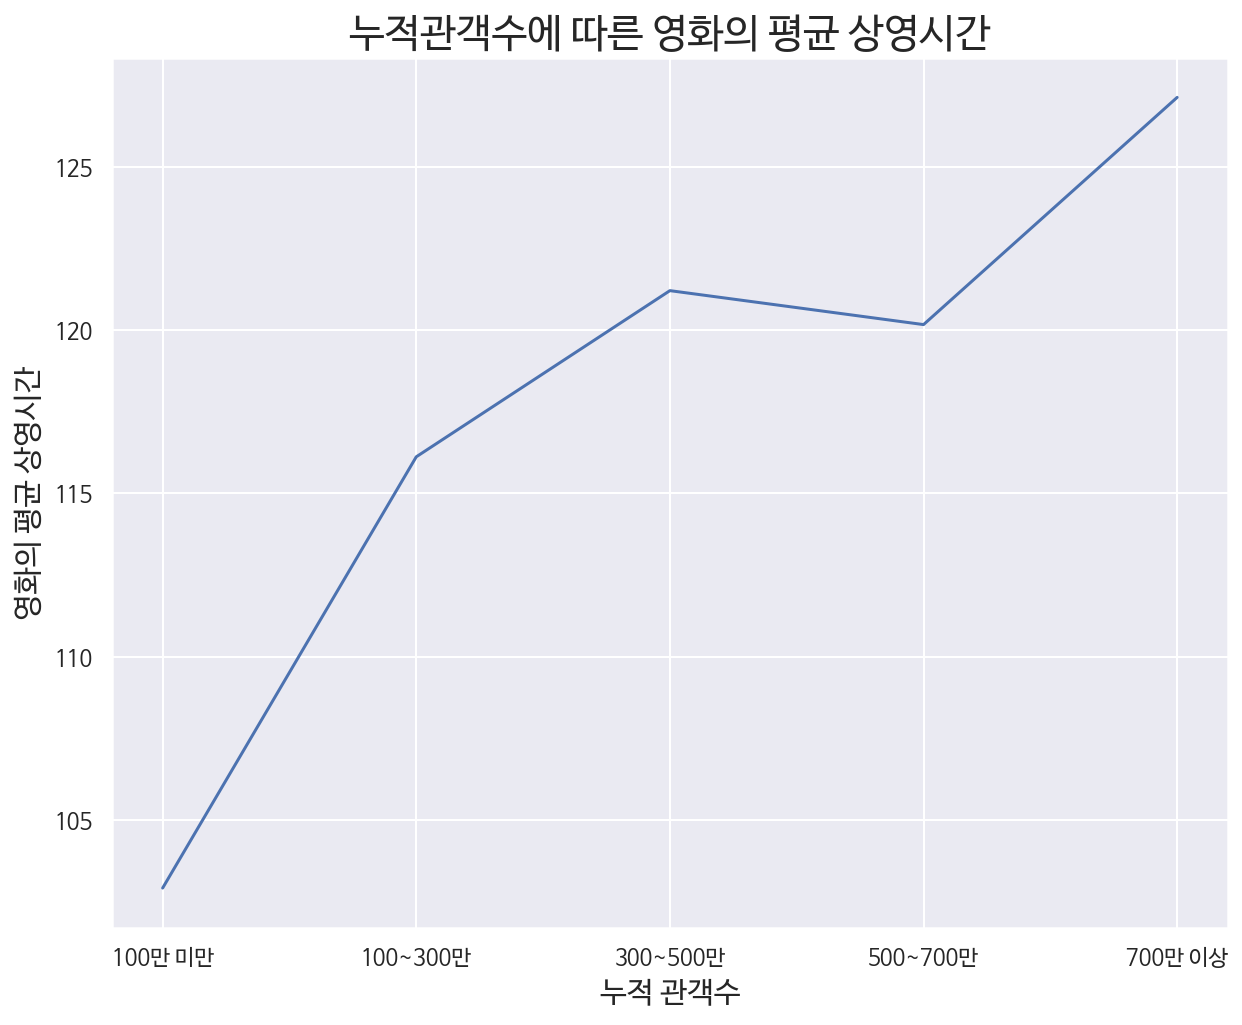

In [147]:
# lineplot
plt.rc('font', family='NanumBarunGothic')

plt.figure(figsize = (10,8))

x = df3_mean.iloc[1:,0]
y = df3_mean.iloc[1:,1]

plt.plot(x, y)

plt.xlabel('누적 관객수', fontsize=15)
plt.ylabel("영화의 평균 상영시간" , fontsize=15)
plt.title("누적관객수에 따른 영화의 평균 상영시간", fontsize = 20)

plt.show()

- 대체로 상영시간과 누적관객수는 비례하는 형태를 띄고있다는것을 확인할수있다.
- 누적관객수를 100만 미만으로 보유하고있는 영화의 평균상영시간이 제일 적다는것을 알수있다.


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


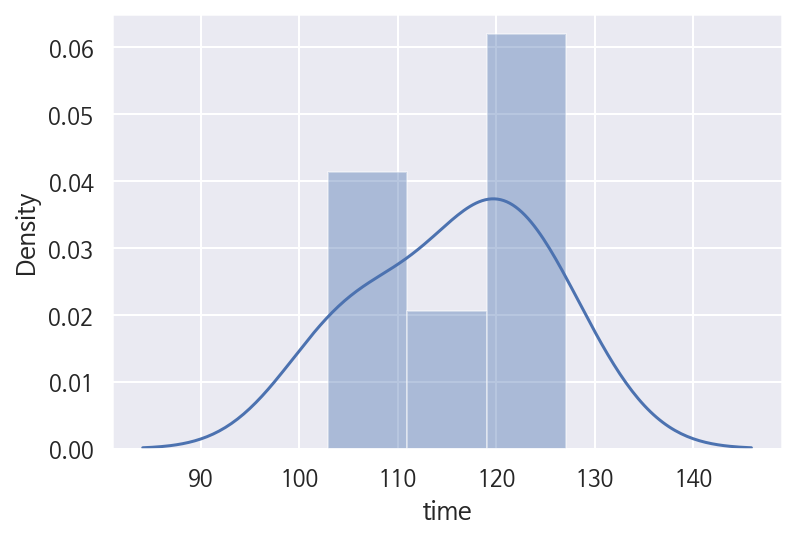

In [138]:
sns.distplot(df3_mean['time'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


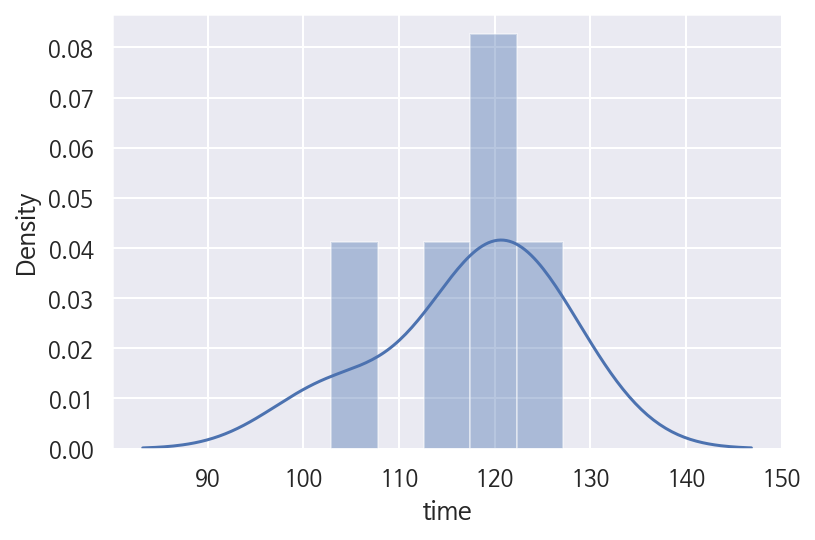

In [141]:
sns.distplot(y)
plt.show()

### 시각화 : 영화 상영시간의 정규분포 확률밀도함수 그래프

In [148]:
df3['time'].mean()

108.09104046242774

In [149]:
df3['time'].std()

17.05873332658311

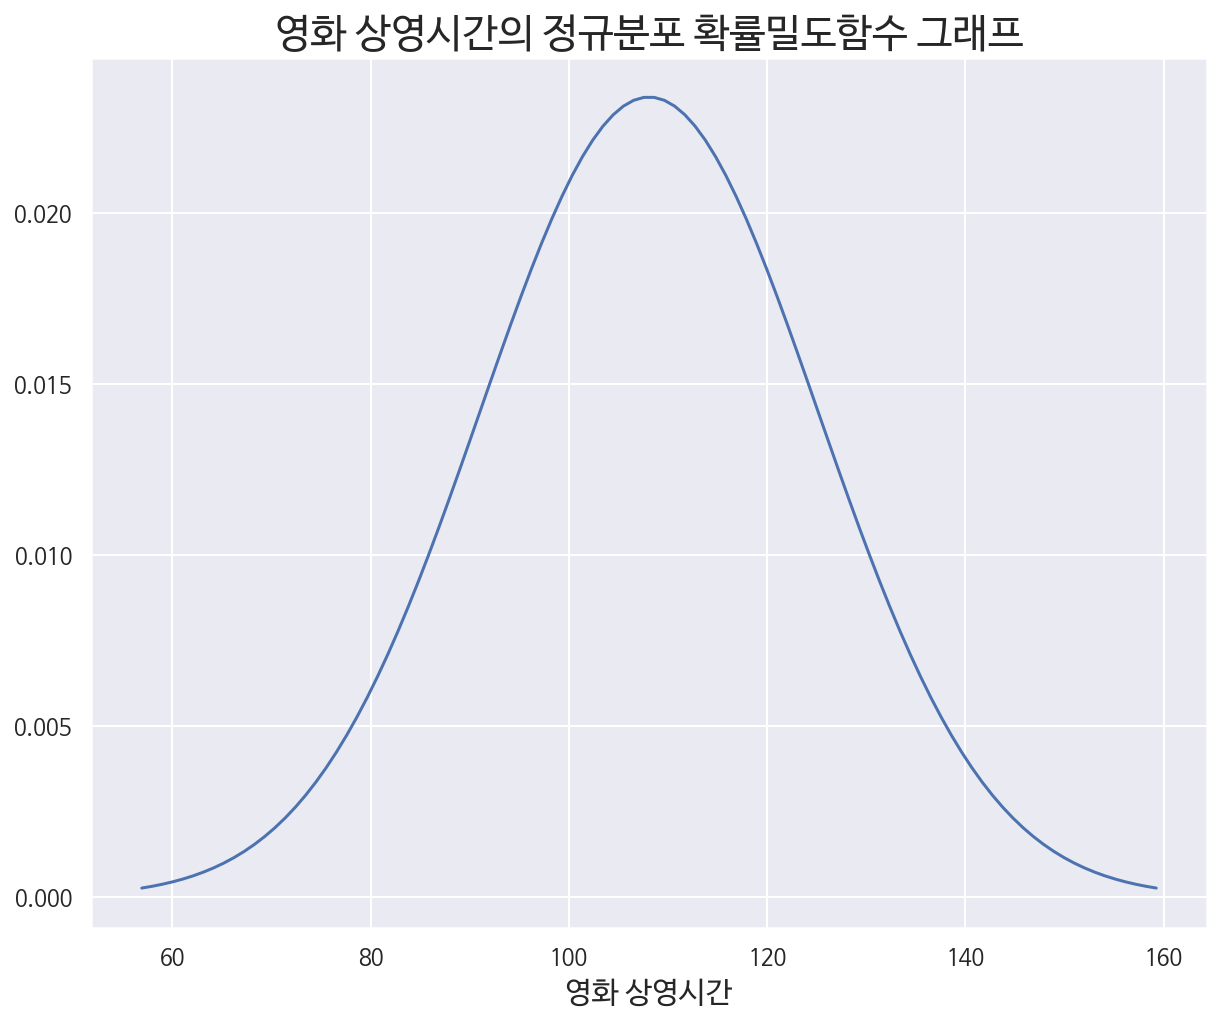

In [146]:
# 영화 상영시간 정규분포 확률밀도함수

import scipy.stats as stats
import math

plt.rc('font', family='NanumBarunGothic')

plt.figure(figsize = (10,8))

mu = df3['time'].mean()
sigma = df3['time'].std()
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))

plt.xlabel('영화 상영시간', fontsize=15)
plt.title("영화 상영시간의 정규분포 확률밀도함수 그래프", fontsize = 20)

plt.show()

- 영화상영시간의 전체 평균은 약 109분 이라는것을 알수있다.
- 100만 미만의 관객수를 보유한 영화의 경우 평균 상영시간이 102.91분 으로 나왔는데 이는 전체 평균보다 훨씬 적은 시간임을 알수있다.


### 시각화 : 상영시간과 누적관객수의 상관관계

#### 전처리

In [154]:
df1

,날짜,영화제목,영화코드,일일 관객수,누적 관객수,전일 대비 증감분,일일 매출액,누적 매출액,일일 상영 스크린수,일일 상영횟수,누적Level
0,20220531,범죄도시 2,20204548,265350,7013525,63932,2642772620,72495151380,0.0,0.0,5
1,20220531,닥터 스트레인지: 대혼돈의 멀티버스,20212855,30422,5803776,11450,318679710,61798271700,0.0,0.0,4
2,20220531,그대가 조국,20224634,17310,189737,2416,169236980,1801689510,0.0,0.0,1
3,20220531,피는 물보다 진하다,20224304,2424,12212,1224,13320500,78773100,0.0,0.0,1
4,20220531,안녕하세요,20217334,2323,19498,1325,17312400,148485860,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
41664,20120115,프렌즈: 몬스터섬의비밀,20113271,15973,498686,-369,115313500,3662498000,189.0,387.0,1
41708,20120111,다크아워,20113652,4931,142322,-5507,37259500,1165058500,215.0,650.0,1
41741,20120108,극장판 포켓몬스터 베스트 위시「비크티니와 백의 영웅 레시라무」,20112709,12541,349214,-3789,86262000,2314523500,152.0,243.0,1
41784,20120104,앨빈과 슈퍼밴드3,20113311,5339,536791,-2595,34123500,3547001000,124.0,247.0,1


In [155]:
df

,title,director,genre,time,country,point,grade,year,date,actor,movie_cd
0,1987,장준환,드라마,129.0,한국,9.23,15세 관람가,2017.0,2017.12.27,김윤석/하정우/유해진/김태리/박희순/이희준/유승목/현봉식/박지환/이용직/박지홍/김경...,20170590
1,1급기밀,홍기선,드라마,101.0,한국,8.89,12세 관람가,2018.0,2018.01.24,김상경/김옥빈/최무성/최귀화/김병철/서현우/황보라/김경남/이항나/이지원/지건우/성병...,20168161
2,48미터,민백두,드라마,97.0,한국,8.94,15세 관람가,2013.0,2013.07.04,박효주/이진희/하석/조한철/안세호/주민하/김용진/지안/김광현/강윤서,20120801
3,4등,정지우,드라마,116.0,한국,8.56,15세 관람가,2016.0,2016.04.13,박해준/이항나/유재상/최무성/정가람/유재명/곽민석/서환희/남문철,20145182
4,82년생 김지영,김도영,드라마,118.0,한국,6.68,12세 관람가,2019.0,2019.10.23,정유미/공유/김미경/공민정/박성연/이봉련/김성철/이얼/김미경/손성찬/강애심/류아영/김정영,20191029
...,...,...,...,...,...,...,...,...,...,...,...
688,희생부활자,곽경택,미스터리,91.0,한국,6.02,15세 관람가,2017.0,2017.10.12,김래원/김해숙/성동일/전혜진/장영남/김민준/정기섭/오대환/전광진/백봉기/이준혁/김주...,20154907
689,서부전선,천성일,전쟁,112.0,한국,6.37,12세 관람가,2015.0,2015.09.24,설경구/여진구/이경영/정성화/정인기/조희봉/김원해/정석원/김선영/노영학/강윤제/한철...,20140193
690,인천상륙작전,이재한,전쟁,110.0,한국,8.04,12세 관람가,2016.0,2016.07.27,이정재/이범수/리암 니슨/진세연/정준호/박철민/김병옥/존 그리스/길금성/신수항/김희...,20156250
691,인천상륙작전 : 익스텐디드 에디션(확장판),이재한,전쟁,141.0,한국,6.92,15세 관람가,2016.0,2016.09.13,이정재/이범수/리암 니슨/진세연/정준호/박철민/김병옥/존 그리스/길금성/신수항/김희...,20160041


In [156]:
f = df1.copy()
d = df.loc[:,['movie_cd','time']]

d.rename(
    columns={
        'movie_cd' : '영화코드',
        'time' : '상영시간'
        },
    inplace = True
)

df3_3 = pd.merge(d,f, on='영화코드', how='inner')
df3_3

,영화코드,상영시간,날짜,영화제목,일일 관객수,누적 관객수,전일 대비 증감분,일일 매출액,누적 매출액,일일 상영 스크린수,일일 상영횟수,누적Level
0,20170590,129.0,20180207,1987,9410,7201087,1549,68214600,57934612645,405.0,709.0,5
1,20168161,101.0,20180131,1급기밀,4322,200090,-11072,26619000,1592776900,168.0,279.0,1
2,20120801,97.0,20130709,48미터,1127,5907,415,8366500,45691500,33.0,93.0,1
3,20145182,116.0,20160418,4등,1260,18049,-2044,8977500,146941500,174.0,381.0,1
4,20191029,118.0,20191203,82년생 김지영,2792,3671152,245,21681220,30244988930,166.0,229.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
687,20154907,91.0,20171018,희생부활자,18054,300737,-3638,129406600,2356707035,606.0,2352.0,1
688,20140193,112.0,20151008,서부전선,2452,599698,-4219,17642500,4683618500,100.0,134.0,1
689,20156250,110.0,20160906,인천상륙작전,4460,7043241,-964,31154500,55062816503,288.0,565.0,5
690,20160041,141.0,20160919,인천상륙작전 : 익스텐디드 에디션(확장판),853,24710,-1425,5915000,204619700,99.0,171.0,1


In [159]:
# 누적 level 빼기
df3_3 = df3_3.drop('누적Level', axis=1)
df3_3

,영화코드,상영시간,날짜,영화제목,일일 관객수,누적 관객수,전일 대비 증감분,일일 매출액,누적 매출액,일일 상영 스크린수,일일 상영횟수
0,20170590,129.0,20180207,1987,9410,7201087,1549,68214600,57934612645,405.0,709.0
1,20168161,101.0,20180131,1급기밀,4322,200090,-11072,26619000,1592776900,168.0,279.0
2,20120801,97.0,20130709,48미터,1127,5907,415,8366500,45691500,33.0,93.0
3,20145182,116.0,20160418,4등,1260,18049,-2044,8977500,146941500,174.0,381.0
4,20191029,118.0,20191203,82년생 김지영,2792,3671152,245,21681220,30244988930,166.0,229.0
...,...,...,...,...,...,...,...,...,...,...,...
687,20154907,91.0,20171018,희생부활자,18054,300737,-3638,129406600,2356707035,606.0,2352.0
688,20140193,112.0,20151008,서부전선,2452,599698,-4219,17642500,4683618500,100.0,134.0
689,20156250,110.0,20160906,인천상륙작전,4460,7043241,-964,31154500,55062816503,288.0,565.0
690,20160041,141.0,20160919,인천상륙작전 : 익스텐디드 에디션(확장판),853,24710,-1425,5915000,204619700,99.0,171.0


In [160]:
df3_3.corr()

,영화코드,상영시간,일일 관객수,누적 관객수,전일 대비 증감분,일일 매출액,누적 매출액,일일 상영 스크린수,일일 상영횟수
영화코드,1.000000,-0.196981,-0.030200,-0.169469,0.134094,-0.001087,-0.142417,-0.061100,-0.184094
상영시간,-0.196981,1.000000,-0.007944,0.410128,-0.082561,-0.013593,0.407901,0.055204,0.077738
일일 관객수,-0.030200,-0.007944,1.000000,0.120197,0.628046,0.993630,0.151248,0.184115,0.221445
누적 관객수,-0.169469,0.410128,0.120197,1.000000,0.007187,0.110252,0.996910,0.065718,0.042577
전일 대비 증감분,0.134094,-0.082561,0.628046,0.007187,1.000000,0.645809,0.030954,-0.137217,-0.123469
일일 매출액,-0.001087,-0.013593,0.993630,0.110252,0.645809,1.000000,0.143038,0.132980,0.159804
누적 매출액,-0.142417,0.407901,0.151248,0.996910,0.030954,0.143038,1.000000,0.072056,0.044129
일일 상영 스크린수,-0.061100,0.055204,0.184115,0.065718,-0.137217,0.132980,0.072056,1.000000,0.908735
일일 상영횟수,-0.184094,0.077738,0.221445,0.042577,-0.123469,0.159804,0.044129,0.908735,1.000000


#### 시각화1(전체컬럼)

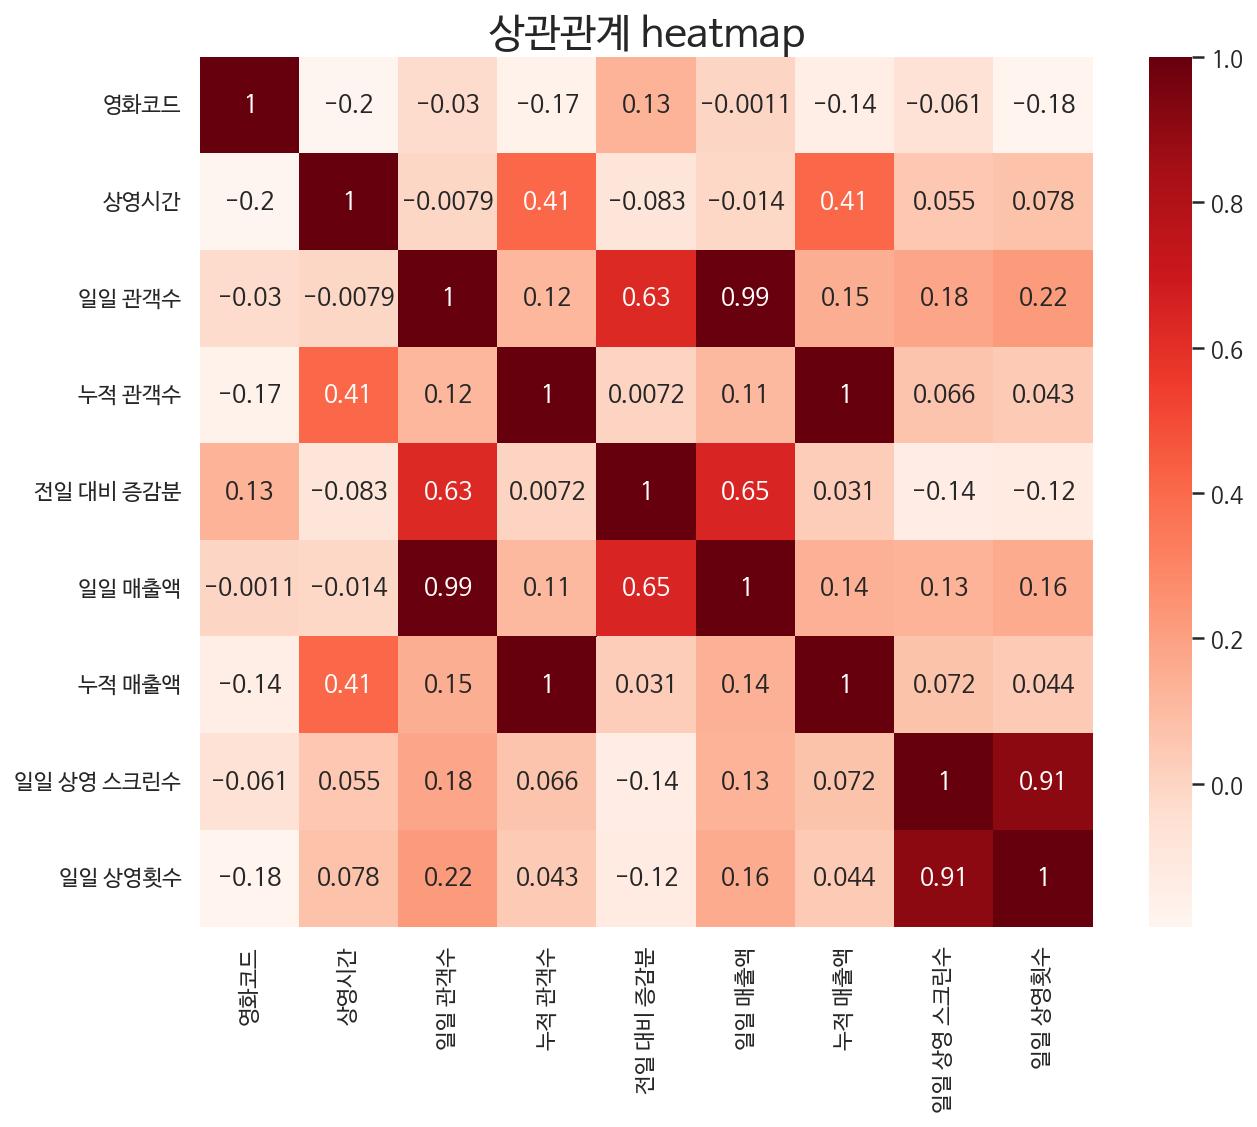

In [162]:
# heatmap - 전체 컬럼 다 본것

plt.rc('font', family='NanumBarunGothic')

plt.figure(figsize = (10,8))

sns.heatmap(df3_3.corr(), annot=True, cmap="Reds")

plt.title("상관관계 heatmap", fontsize = 20)

plt.show()

In [171]:
# 영화상영시간과 누적관객수 사이의 상관관계
a = df3_3['상영시간']
b = df3_3['누적 관객수']

df3_corr = pd.merge(a,b,left_index = True, right_index = True) 
df3_corr

,상영시간,누적 관객수
0,129.0,7201087
1,101.0,200090
2,97.0,5907
3,116.0,18049
4,118.0,3671152
...,...,...
687,91.0,300737
688,112.0,599698
689,110.0,7043241
690,141.0,24710


In [175]:
df3_corr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 692 entries, 0 to 691
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   상영시간    692 non-null    float64
 1   누적 관객수  692 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 32.4 KB


In [172]:
df3_corr.corr()

,상영시간,누적 관객수
상영시간,1.000000,0.410128
누적 관객수,0.410128,1.000000


#### 시각화2(상영시간, 누적관객수)

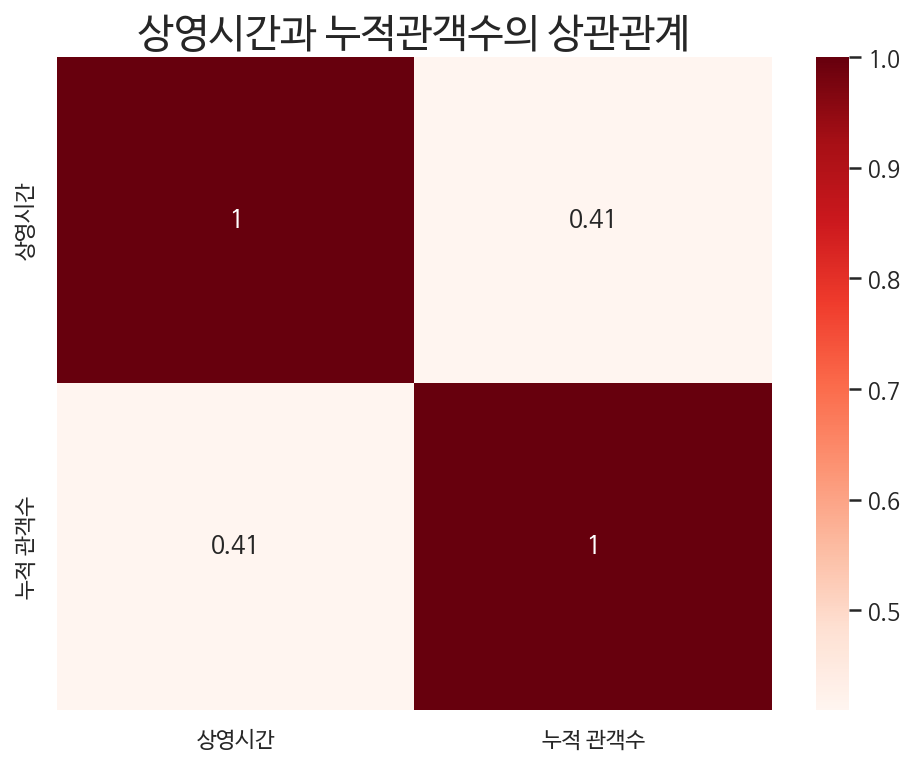

In [174]:
# heatmap - 상영시간과 누적관계수만 본것.

plt.rc('font', family='NanumBarunGothic')

plt.figure(figsize = (8,6))

sns.heatmap(df3_corr.corr(), annot=True, cmap="Reds")

plt.title("상영시간과 누적관객수의 상관관계", fontsize = 20)

plt.show()

- 상영시간과 누적관객수의 상관관계가 0.41로 나왔는데 이는 두 컬럼이 뚜렷한 양적 상관관계를 가졌다는것의 의미한다.
- 즉, 상영시간이 평균상영시간 이상일경우 상영시간이 길수록 관객들이 선호한다는 얘기가 된다.
  - 보통의 퀄리티 높은 영화들은 보여줄 내용이 많기에 상영시간이 길것이므로 결국은 내용이나 퀄리티가 좋아야 흥행한다고 생각한다. 무조건 상영시간이 길다고해서 모든 영화가 흥행하는것은 아니다.